In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from dateutil import parser
from datetime import datetime
%matplotlib inline
dir_name='model3'

In [2]:
"""
读取数据
"""

economic_df = pd.read_csv('C:\Alex_Code\quant_competetion-final\data\economic_indicator.csv', 
                          encoding='utf-8-sig', index_col='DateTime')
economic_df.index=economic_df.index.map(lambda x:str(x)[:-3])
economic_df.index = pd.DatetimeIndex(economic_df.index)
index1='CPI当月同比'
index2='工业增加值当月同比'
economic_df = economic_df[[index1, index2]]

In [4]:
"""
计算每个月的趋势
"""

economic_df['cpi_trend']= 'up'
economic_df['growth_trend']= 'down'
month=4

for  i in range(0, economic_df.__len__() - month):
    if economic_df.iloc[i][index1]>=economic_df.iloc[i + 1][index1] and economic_df.iloc[i + 1][index1]>=economic_df.iloc[i + 2][index1] and \
        economic_df.iloc[i + 2][index1] >= economic_df.iloc[i + 3][index1] :
        economic_df.ix[i, 'cpi_trend']= 'down'
        continue

    if economic_df.iloc[i][index1]<=economic_df.iloc[i + 1][index1] and economic_df.iloc[i + 1][index1]<=economic_df.iloc[i + 2][index1] and \
        economic_df.iloc[i + 2][index1] <= economic_df.iloc[i + 3][index1] :
        economic_df.ix[i, 'cpi_trend']= 'up'
        continue

    if economic_df.iloc[i][index1]>=max(economic_df.iloc[i + 1][index1], economic_df.iloc[i + 2][index1] , economic_df.iloc[i + 3][index1]) \
        and economic_df.iloc[i + month][index1]<=min(economic_df.iloc[i + 1][index1], economic_df.iloc[i + 2][index1] , economic_df.iloc[i + 3][index1]):
        economic_df.ix[i, 'cpi_trend']= 'down'
        continue

    if economic_df.iloc[i][index1] <= min(economic_df.iloc[i + 1][index1], economic_df.iloc[i + 2][index1], economic_df.iloc[i + 3][index1]) \
            and economic_df.iloc[i + month][index1] >= max(economic_df.iloc[i + 1][index1], economic_df.iloc[i + 2][index1], economic_df.iloc[i + 3][index1]):
        economic_df.ix[i, 'cpi_trend'] = 'up'
        continue
    economic_df.ix[i, 'cpi_trend']=economic_df.iloc[i - 1]['cpi_trend']

for  i in range(0, economic_df.__len__() - month):
    if economic_df.iloc[i][index2]>=economic_df.iloc[i + 1][index2] and economic_df.iloc[i + 1][index2]>=economic_df.iloc[i + 2][index2] and \
        economic_df.iloc[i + 2][index2] >= economic_df.iloc[i + 3][index2] :
        economic_df.ix[i, 'growth_trend']= 'down'
        continue

    if economic_df.iloc[i][index2]<=economic_df.iloc[i + 1][index2] and economic_df.iloc[i + 1][index2]<=economic_df.iloc[i + 2][index2] and \
        economic_df.iloc[i + 2][index2] <= economic_df.iloc[i + 3][index2] :
        economic_df.ix[i, 'growth_trend']= 'up'
        continue

    if economic_df.iloc[i][index2]>=max(economic_df.iloc[i + 1][index2], economic_df.iloc[i + 2][index2] , economic_df.iloc[i + 3][index2]) \
        and economic_df.iloc[i + month][index2]<=min(economic_df.iloc[i + 1][index2], economic_df.iloc[i + 2][index2] , economic_df.iloc[i + 3][index2]):
        economic_df.ix[i, 'growth_trend']= 'down'
        continue

    if economic_df.iloc[i][index2] <= min(economic_df.iloc[i + 1][index2], economic_df.iloc[i + 2][index2], economic_df.iloc[i + 3][index2]) \
            and economic_df.iloc[i + month][index2] >= max(economic_df.iloc[i + 1][index2], economic_df.iloc[i + 2][index2], economic_df.iloc[i + 3][index2]):
        economic_df.ix[i, 'growth_trend'] = 'up'
        continue
    economic_df.ix[i, 'growth_trend']=economic_df.iloc[i - 1]['growth_trend']

economic_df['trend']= ''

for  i in range(0, economic_df.__len__() - month):
    if economic_df.ix[i, 'growth_trend']== 'up':
        if economic_df.ix[i, 'cpi_trend']== 'up':
            economic_df.ix[i, 'trend']= '过热'
        else:
            economic_df.ix[i, 'trend'] = '复苏'
    else:
        if economic_df.ix[i, 'cpi_trend']== 'up':
            economic_df.ix[i, 'trend']= '滞涨'
        else:
            economic_df.ix[i, 'trend'] = '衰退'

# economic_df[['cpi_trend','growth_trend','trend']].to_csv('./'+dir_name+'/trends.csv',encoding='utf-8-sig')

C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWa

C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.lo

C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:54: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: 
.ix is deprecated. Please use
.lo

In [22]:
"""
计算时钟周期
"""
df=economic_df[['cpi_trend','growth_trend','trend']]
df=df['2012':'2016']
periods=pd.DataFrame({'start': '', 'end': '', 'trend': ''}, index=[0])

id=0
temp_trend=df.ix[0,'trend']
temp_start_time=df.index[0]
temp_end_time=df.index[0]

for i in range(df.__len__()):
    if df.ix[i,'trend']!=temp_trend:
        temp_end_time=df.index[i-1]
        periods=periods.append(pd.DataFrame({'start':temp_start_time.date(), 'end':temp_end_time.date(), 'trend':temp_trend}, index=[i]))
        temp_start_time = df.index[i]
        temp_trend=df.ix[i,'trend']
temp_end_time = df.index[ - 1]
periods = periods.append(
    pd.DataFrame({'start': temp_start_time.date(), 'end': temp_end_time.date(), 'trend': temp_trend}, index=[i]))

periods.index=pd.Series(list(range(periods.__len__())))
periods.index.name='id'
periods.drop(index=0,inplace=True)
from dateutil.relativedelta import relativedelta
periods['end'] = periods['end'].map(lambda  x:(x+relativedelta(months=1)-relativedelta(days=x.day)))

periods.to_csv('./'+dir_name+'/periods-2017.csv',encoding='utf-8-sig')


C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [23]:
"""
计算收益排行
"""
from WindPy import *
def get_wind_data(start, end):
    df=w.wss("801011.SI,801012.SI,801013.SI,801014.SI,801015.SI,801016.SI,801017.SI,801018.SI,801021.SI,801022.SI,801023.SI,801024.SI,801032.SI,801033.SI,801034.SI,801035.SI,801036.SI,801037.SI,801041.SI,801051.SI,801053.SI,801054.SI,801055.SI,801072.SI,801073.SI,801074.SI,801075.SI,801076.SI,801081.SI,801082.SI,801083.SI,801084.SI,801085.SI,801092.SI,801093.SI,801094.SI,801101.SI,801102.SI,801111.SI,801112.SI,801123.SI,801124.SI,801131.SI,801132.SI,801141.SI,801142.SI,801143.SI,801151.SI,801152.SI,801153.SI,801154.SI,801155.SI,801156.SI,801161.SI,801162.SI,801163.SI,801164.SI,801171.SI,801172.SI,801173.SI,801174.SI,801175.SI,801176.SI,801177.SI,801178.SI,801181.SI,801182.SI,801191.SI,801192.SI,801193.SI,801194.SI,801202.SI,801203.SI,801204.SI,801205.SI,801211.SI,801212.SI,801213.SI,801214.SI,801215.SI,801222.SI,801223.SI,801231.SI,801711.SI,801712.SI,801713.SI,801721.SI,801722.SI,801723.SI,801724.SI,801725.SI,801731.SI,801732.SI,801733.SI,801734.SI,801741.SI,801742.SI,801743.SI,801744.SI,801751.SI,801752.SI,801761.SI,801881.SI",
             "pct_chg_per,sec_name","startDate="+start+";endDate="+end,usedf=True)[1]
    df=df.set_index('SEC_NAME')
    df.columns=[start+'-'+end]
    df.index.name='code'
    return df

In [24]:
def get_paiming(df=pd.DataFrame([]),trend=''):
    # print(trend,df)
    number_of_time = df.__len__()
    dff=pd.DataFrame()
    for i in range(number_of_time):
        start_time = df.iloc[i]['start']
        end_time = df.iloc[i]['end']
        dff=dff.join(get_wind_data(start_time,end_time),how='right')

    df.dropna(inplace=True)
    # dff = dff[dff.index.map(int) > 2000012551000000]
    dff.to_csv('./'+dir_name+'/'+trend+'.csv',encoding='utf-8-sig')
    return []

In [25]:

w.start()
ZHOUQI = ['复苏', '过热', '滞涨', '衰退']
rank = periods
rank = rank.sort_values('trend')
# rank['start']=rank['start'].map(str)
# rank['end']=rank['end'].map(str)
# rank['start']=rank['start'].map(parser.parse)
# rank['end']=rank['end'].map(parser.parse)
rank['start'] = rank['start'].map(lambda  x:x.strftime('%Y%m%d'))
rank['end'] = rank['end'].map(lambda  x:x.strftime('%Y%m%d'))
for trend in ZHOUQI:
    get_paiming(rank[rank['trend'] ==trend],trend)
w.close()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [26]:
"""
按照收益率综合排序
"""
ZHOUQI = [['复苏'], ['过热'], ['滞涨'], ['衰退']]
ZHOUQI = np.array(ZHOUQI)

for line in ZHOUQI:
    trend = line[0]

    df = pd.read_csv('./'+dir_name+'/'+str(trend)+'.csv', encoding='utf-8-sig',index_col='code',engine='python')
    df['total_return_rate'] = 0
    df=df.dropna()
    for i in range(df.__len__()):
        df['total_return_rate'].iloc[i] = df.iloc[i,1:].values.sum()
    df=df.sort_values('total_return_rate',ascending=False)
    df=df[df.columns.sort_values()]
    df.to_csv('./'+dir_name+'/'+str(trend)+'_sort.csv',encoding='utf-8-sig')


In [11]:
"""
按照收益排名排序
"""
ZHOUQI = [['复苏'], ['过热'], ['滞涨'], ['衰退']]
ZHOUQI = np.array(ZHOUQI)

for line in ZHOUQI:
    trend = line[0]
    df = pd.read_csv('./'+dir_name+'/'+str(trend)+'.csv', encoding='utf-8-sig',index_col='code',engine='python')
    df['total_return_rate'] = 0
    df.dropna(inplace=True)
    df['rank']=0
    for i in df.columns:
        if i in ('rank','total_return_rate'):
            continue
        df=df.sort_values(i,ascending=False)
        df[i+'_rank']=df.reset_index().index
        df['rank']+=df[i+'_rank']
    df=df.sort_values('rank')
    df.to_csv('./'+dir_name+'/'+str(trend)+'_sort.csv',encoding='utf-8-sig')


In [59]:
def trade_model1(df_to_today, today, money, cash, portfolio):
    df_to_today.loc[today]
    df = pd.read_csv('./' + dir_name + '/trends.csv', encoding='utf-8-sig', index_col='DateTime')
    df.index = df.index.map(lambda x: x[:-3])
    trend = df.loc[today.strftime('%Y') + '-' + today.strftime('%m')]['trend']

    df = pd.read_csv('./' + dir_name + '/' + trend + '_sort.csv', encoding='utf-8-sig', engine='python',
                     index_col='code')
    num = 5
    targets = []
    for i in range(num):
        targets.append(df.index[i])

    df = pd.read_csv('./data/code_to_name.csv', engine='python', encoding='utf-8-sig', index_col='SEC_NAME')

    for obj, share in portfolio.items():
        cash += df_to_today[df.loc[obj]['code']][-1] * share

    portfolio = {}

    cash_share = (cash / targets.__len__())
    for target in targets:

        if pd.notna(df_to_today[df.loc[target]['code']][-1]):
            portfolio[target] = cash_share / df_to_today[df.loc[target]['code']][-1]
            cash -= cash_share

    money = cash

    for key, value in portfolio.items():
        money += df_to_today[df.loc[key]['code']][-1] * value

    # print(today, money, cash, portfolio)
    return money, cash, portfolio

def trade_model2_3month(df_to_today, today, money, cash, portfolio):
    df_to_today.loc[today]
    df = pd.read_csv('./' + dir_name + '/trends.csv', encoding='utf-8-sig', index_col='DateTime')
    df.index = df.index.map(lambda x: x[:-3])
    trend = \
        df.loc[
            (today - relativedelta(months=3)).strftime('%Y') + '-' + (today - relativedelta(months=3)).strftime('%m')][
            'trend']

    df = pd.read_csv('./' + dir_name + '/' + trend + '_sort.csv', encoding='utf-8-sig', engine='python',
                     index_col='code')
    num = 5
    targets = []
    for i in range(num):
        targets.append(df.index[i])
    df = pd.read_csv('./data/code_to_name.csv', engine='python', encoding='utf-8-sig', index_col='SEC_NAME')

    for obj, share in portfolio.items():
        cash += df_to_today[df.loc[obj]['code']][-1] * share

    portfolio = {}

    cash_share = (cash / targets.__len__())
    for target in targets:

        if pd.notna(df_to_today[df.loc[target]['code']][-1]):
            portfolio[target] = cash_share / df_to_today[df.loc[target]['code']][-1]
            cash -= cash_share

    money = cash

    for key, value in portfolio.items():
        money += df_to_today[df.loc[key]['code']][-1] * value

    # print(today, money, cash, portfolio)
    return money, cash, portfolio

TIME_TO_BUY = {'衰退': '医药生物(申万)',
               '滞涨': '农林牧渔(申万)',
               '复苏': '房地产(申万)',
               '过热': '传媒(申万)',
               'HS300': ['hs300']}

def trade_model3_3month(df_to_today, today, money, cash, portfolio):
    df_to_today.loc[today]
    df = pd.read_csv('./' + dir_name + '/trends.csv', encoding='utf-8-sig', index_col='DateTime')
    df.index = df.index.map(lambda x: x[:-3])
    trend = \
        df.loc[
            (today - relativedelta(months=3)).strftime('%Y') + '-' + (today - relativedelta(months=3)).strftime('%m')][
            'trend']

    df = pd.read_csv('./' + dir_name + '/' + trend + '_sort.csv', encoding='utf-8-sig', engine='python',
                     index_col='code')
    targets = [TIME_TO_BUY[trend]]
    df = pd.read_csv('./data/code_to_name_1.csv', engine='python', encoding='utf-8-sig', index_col='SEC_NAME')

    for obj, share in portfolio.items():
        cash += df_to_today[df.loc[obj]['code']][-1] * share

    portfolio = {}

    cash_share = (cash / targets.__len__())
    for target in targets:

        if pd.notna(df_to_today[df.loc[target]['code']][-1]):
            portfolio[target] = cash_share / df_to_today[df.loc[target]['code']][-1]
            cash -= cash_share

    money = cash

    for key, value in portfolio.items():
        money += df_to_today[df.loc[key]['code']][-1] * value

    # print(today, money, cash, portfolio)
    return money, cash, portfolio

def timetosell(df_to_today, ma1, ma2, portfolio):
    ma_max = max(ma1, ma2)
    if len(df_to_today) < ma_max:
        return False
    df = pd.read_csv('./data/code_to_name_1.csv', engine='python', encoding='utf-8-sig', index_col='SEC_NAME')

    for key, value in portfolio.items():
        today_ma1 = df_to_today[df.loc[key]['code']][-ma1:].sum() / ma1
        today_ma2 = df_to_today[df.loc[key]['code']][-ma2:].sum() / ma2
        yesterday_ma1 = df_to_today[df.loc[key]['code']][-(ma1+1):-1].sum() / ma1
        yesterday_ma2 = df_to_today[df.loc[key]['code']][-(ma2+1):-1].sum() / ma2
        if today_ma1<today_ma2 and yesterday_ma1>yesterday_ma2:
            return True
    return False

def timetobuy(df_to_today, ma1, ma2,trend):
    ma_max = max(ma1, ma2)
    if len(df_to_today) < ma_max:
        return False
    df = pd.read_csv('./data/code_to_name_1.csv', engine='python', encoding='utf-8-sig', index_col='SEC_NAME')
    
    key=TIME_TO_BUY[trend]
    today_ma1 = df_to_today[df.loc[key]['code']][-ma1:].sum() / ma1
    today_ma2 = df_to_today[df.loc[key]['code']][-ma2:].sum() / ma2
    yesterday_ma1 = df_to_today[df.loc[key]['code']][-(ma1+1):-1].sum() / ma1
    yesterday_ma2 = df_to_today[df.loc[key]['code']][-(ma2+1):-1].sum() / ma2
    if today_ma1>today_ma2 and yesterday_ma1<yesterday_ma2:
        return True
    else:
        return False

def trade_model3_3month_ma(df_to_today, today, money, cash, portfolio):
    df_to_today.loc[today]
    df = pd.read_csv('./' + dir_name + '/trends.csv', encoding='utf-8-sig', index_col='DateTime')
    df.index = df.index.map(lambda x: x[:-3])
    trend = \
        df.loc[
            (today - relativedelta(months=3)).strftime('%Y') + '-' + (today - relativedelta(months=3)).strftime('%m')][
            'trend']

    df = pd.read_csv('./' + dir_name + '/' + trend + '_sort.csv', encoding='utf-8-sig', engine='python',
                     index_col='code')
    targets = [TIME_TO_BUY[trend]]
    df = pd.read_csv('./data/code_to_name_1.csv', engine='python', encoding='utf-8-sig', index_col='SEC_NAME')

    if portfolio!={} and timetosell(df_to_today, 5, 20, portfolio):
        for obj, share in portfolio.items():
            cash += df_to_today[df.loc[obj]['code']][-1] * share
        portfolio = {}
        print('sell')
        
    if cash > 0 and timetobuy(df_to_today, 5, 20,trend):
        cash_share = (cash / targets.__len__())
        for target in targets:

            if pd.notna(df_to_today[df.loc[target]['code']][-1]):
                portfolio[target] = cash_share / df_to_today[df.loc[target]['code']][-1]
                cash -= cash_share
        print('buy')
        
    money = cash

    for key, value in portfolio.items():
        money += df_to_today[df.loc[key]['code']][-1] * value

    print(today, money, cash, portfolio)
    return money, cash, portfolio


In [60]:
import back_test
from dateutil.relativedelta import relativedelta
close_df = pd.read_csv('./data/index_close.csv', encoding='utf-8-sig',index_col='DateTime')
close_df.index=pd.DatetimeIndex(close_df.index)
backtest1 = back_test.back_test_system(close_df, 'hs300', save_dir='./back_test/')
# df=backtest1.back_test_by_day('lundong',trade_model1,'20100101','20180329')
# df=backtest1.back_test_by_day('lundong_3month',trade_model2_3month,'20100101','20180329')
close_df_1 = pd.read_csv('./data/index_1_close.csv', encoding='utf-8-sig',index_col='DateTime')
close_df_1.index=pd.DatetimeIndex(close_df_1.index)
backtest1.close_df=close_df_1
# df=backtest1.back_test_by_day('etf',trade_model3_3month,'20100101','20180329')
df=backtest1.back_test_by_day('etf_ma',trade_model3_3month_ma,'20100101','20180329')

2010-01-04 00:00:00 1000000 1000000 {}
2010-01-05 00:00:00 1000000 1000000 {}
2010-01-06 00:00:00 1000000 1000000 {}
2010-01-07 00:00:00 1000000 1000000 {}
2010-01-08 00:00:00 1000000 1000000 {}
2010-01-11 00:00:00 1000000 1000000 {}
2010-01-12 00:00:00 1000000 1000000 {}
2010-01-13 00:00:00 1000000 1000000 {}
2010-01-14 00:00:00 1000000 1000000 {}
2010-01-15 00:00:00 1000000 1000000 {}
2010-01-18 00:00:00 1000000 1000000 {}
2010-01-19 00:00:00 1000000 1000000 {}
2010-01-20 00:00:00 1000000 1000000 {}
2010-01-21 00:00:00 1000000 1000000 {}
2010-01-22 00:00:00 1000000 1000000 {}
2010-01-25 00:00:00 1000000 1000000 {}
2010-01-26 00:00:00 1000000 1000000 {}


2010-01-27 00:00:00 1000000 1000000 {}
2010-01-28 00:00:00 1000000 1000000 {}
2010-01-29 00:00:00 1000000 1000000 {}
2010-02-01 00:00:00 1000000 1000000 {}
2010-02-02 00:00:00 1000000 1000000 {}
2010-02-03 00:00:00 1000000 1000000 {}
2010-02-04 00:00:00 1000000 1000000 {}
2010-02-05 00:00:00 1000000 1000000 {}
2010-02-08 00:00:00 1000000 1000000 {}
2010-02-09 00:00:00 1000000 1000000 {}
2010-02-10 00:00:00 1000000 1000000 {}
2010-02-11 00:00:00 1000000 1000000 {}


2010-02-12 00:00:00 1000000 1000000 {}
2010-02-22 00:00:00 1000000 1000000 {}
buy
2010-02-23 00:00:00 1000000.0 0.0 {'传媒(申万)': 1560.6710885680843}
2010-02-24 00:00:00 1019960.9832227858 0.0 {'传媒(申万)': 1560.6710885680843}
2010-02-25 00:00:00 1034085.056574327 0.0 {'传媒(申万)': 1560.6710885680843}
2010-02-26 00:00:00 1034334.7639484978 0.0 {'传媒(申万)': 1560.6710885680843}
2010-03-01 00:00:00 1042637.5341396802 0.0 {'传媒(申万)': 1560.6710885680843}
2010-03-02 00:00:00 1031744.0499414749 0.0 {'传媒(申万)': 1560.6710885680843}
2010-03-03 00:00:00 1063269.60593055 0.0 {'传媒(申万)': 1560.6710885680843}
2010-03-04 00:00:00 1015809.5981271947 0.0 {'传媒(申万)': 1560.6710885680843}
2010-03-05 00:00:00 1013577.8384705425 0.0 {'传媒(申万)': 1560.6710885680843}
2010-03-08 00:00:00 1026000.7803355443 0.0 {'传媒(申万)': 1560.6710885680843}
2010-03-09 00:00:00 1027108.8568084276 0.0 {'传媒(申万)': 1560.6710885680843}


2010-03-10 00:00:00 1007475.6145142411 0.0 {'传媒(申万)': 1560.6710885680843}
2010-03-11 00:00:00 993663.6753804137 0.0 {'传媒(申万)': 1560.6710885680843}
sell
2010-03-12 00:00:00 985579.3991416309 985579.3991416309 {}
2010-03-15 00:00:00 985579.3991416309 985579.3991416309 {}
2010-03-16 00:00:00 985579.3991416309 985579.3991416309 {}
2010-03-17 00:00:00 985579.3991416309 985579.3991416309 {}
2010-03-18 00:00:00 985579.3991416309 985579.3991416309 {}
2010-03-19 00:00:00 985579.3991416309 985579.3991416309 {}


buy
2010-03-22 00:00:00 985579.3991416307 0.0 {'传媒(申万)': 1455.804134625747}
2010-03-23 00:00:00 975461.5604059818 0.0 {'传媒(申万)': 1455.804134625747}
2010-03-24 00:00:00 977557.918359843 0.0 {'传媒(申万)': 1455.804134625747}
2010-03-25 00:00:00 968575.6068492022 0.0 {'传媒(申万)': 1455.804134625747}
2010-03-26 00:00:00 982522.2104589167 0.0 {'传媒(申万)': 1455.804134625747}
2010-03-29 00:00:00 983570.3894358473 0.0 {'传媒(申万)': 1455.804134625747}
2010-03-30 00:00:00 993586.3218820724 0.0 {'传媒(申万)': 1455.804134625747}
2010-03-31 00:00:00 996541.6042753627 0.0 {'传媒(申万)': 1455.804134625747}
2010-04-01 00:00:00 1007547.4835331334 0.0 {'传媒(申万)': 1455.804134625747}
2010-04-02 00:00:00 1009309.0065360304 0.0 {'传媒(申万)': 1455.804134625747}
2010-04-06 00:00:00 1011318.0162418139 0.0 {'传媒(申万)': 1455.804134625747}
2010-04-07 00:00:00 1007663.9478639034 0.0 {'传媒(申万)': 1455.804134625747}


2010-04-08 00:00:00 1012380.7532600907 0.0 {'传媒(申万)': 1455.804134625747}
2010-04-09 00:00:00 1039123.8752131658 0.0 {'传媒(申万)': 1455.804134625747}
2010-04-12 00:00:00 1055268.7430661654 0.0 {'传媒(申万)': 1455.804134625747}
2010-04-13 00:00:00 1025977.9638774953 0.0 {'传媒(申万)': 1455.804134625747}
2010-04-14 00:00:00 1032572.7566073498 0.0 {'传媒(申万)': 1455.804134625747}
2010-04-15 00:00:00 1009847.6540658419 0.0 {'传媒(申万)': 1455.804134625747}
2010-04-16 00:00:00 1011157.8777870053 0.0 {'传媒(申万)': 1455.804134625747}
2010-04-19 00:00:00 965358.2797116792 0.0 {'传媒(申万)': 1455.804134625747}
sell
2010-04-20 00:00:00 982463.9782935317 982463.9782935317 {}
2010-04-21 00:00:00 982463.9782935317 982463.9782935317 {}
2010-04-22 00:00:00 982463.9782935317 982463.9782935317 {}
2010-04-23 00:00:00 982463.9782935317 982463.9782935317 {}


2010-04-26 00:00:00 982463.9782935317 982463.9782935317 {}
buy
2010-04-27 00:00:00 982463.9782935317 0.0 {'传媒(申万)': 1423.2214197875328}
sell
2010-04-28 00:00:00 963492.4367677639 963492.4367677639 {}
2010-04-29 00:00:00 963492.4367677639 963492.4367677639 {}
2010-04-30 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-04 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-05 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-06 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-07 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-10 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-11 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-12 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-13 00:00:00 963492.4367677639 963492.4367677639 {}


2010-05-14 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-17 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-18 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-19 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-20 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-21 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-24 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-25 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-26 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-27 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-28 00:00:00 963492.4367677639 963492.4367677639 {}
2010-05-31 00:00:00 963492.4367677639 963492.4367677639 {}
2010-06-01 00:00:00 963492.4367677639 963492.4367677639 {}


2010-06-02 00:00:00 963492.4367677639 963492.4367677639 {}
2010-06-03 00:00:00 963492.4367677639 963492.4367677639 {}
2010-06-04 00:00:00 963492.4367677639 963492.4367677639 {}
2010-06-07 00:00:00 963492.4367677639 963492.4367677639 {}
2010-06-08 00:00:00 963492.4367677639 963492.4367677639 {}
buy
2010-06-09 00:00:00 963492.4367677639 0.0 {'农林牧渔(申万)': 494.5018947591954}
2010-06-10 00:00:00 976591.7919599351 0.0 {'农林牧渔(申万)': 494.5018947591954}
2010-06-11 00:00:00 966746.2592352794 0.0 {'农林牧渔(申万)': 494.5018947591954}
2010-06-17 00:00:00 954893.0488179015 0.0 {'农林牧渔(申万)': 494.5018947591954}
2010-06-18 00:00:00 917637.2760667438 0.0 {'农林牧渔(申万)': 494.5018947591954}
2010-06-21 00:00:00 947821.671722845 0.0 {'农林牧渔(申万)': 494.5018947591954}
sell
2010-06-22 00:00:00 955916.667740053 955916.667740053 {}
2010-06-23 00:00:00 955916.667740053 955916.667740053 {}


2010-06-24 00:00:00 955916.667740053 955916.667740053 {}
2010-06-25 00:00:00 955916.667740053 955916.667740053 {}
2010-06-28 00:00:00 955916.667740053 955916.667740053 {}
2010-06-29 00:00:00 955916.667740053 955916.667740053 {}
2010-06-30 00:00:00 955916.667740053 955916.667740053 {}
2010-07-01 00:00:00 955916.667740053 955916.667740053 {}
2010-07-02 00:00:00 955916.667740053 955916.667740053 {}
2010-07-05 00:00:00 955916.667740053 955916.667740053 {}
2010-07-06 00:00:00 955916.667740053 955916.667740053 {}
2010-07-07 00:00:00 955916.667740053 955916.667740053 {}
2010-07-08 00:00:00 955916.667740053 955916.667740053 {}
2010-07-09 00:00:00 955916.667740053 955916.667740053 {}
2010-07-12 00:00:00 955916.667740053 955916.667740053 {}


2010-07-13 00:00:00 955916.667740053 955916.667740053 {}
2010-07-14 00:00:00 955916.667740053 955916.667740053 {}
2010-07-15 00:00:00 955916.667740053 955916.667740053 {}
2010-07-16 00:00:00 955916.667740053 955916.667740053 {}
2010-07-19 00:00:00 955916.667740053 955916.667740053 {}
2010-07-20 00:00:00 955916.667740053 955916.667740053 {}
buy
2010-07-21 00:00:00 955916.6677400531 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-07-22 00:00:00 963891.5008969501 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-07-23 00:00:00 967918.3968474624 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-07-26 00:00:00 989568.884487276 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-07-27 00:00:00 992937.7909033907 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-07-28 00:00:00 1014783.0434453858 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-07-29 00:00:00 1019941.6813950618 0.0 {'农林牧渔(申万)': 526.3916275179535}


2010-07-30 00:00:00 1022073.5674865096 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-02 00:00:00 1041571.1133697745 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-03 00:00:00 1025695.141883833 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-04 00:00:00 1053988.691862923 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-05 00:00:00 1069590.9397025553 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-06 00:00:00 1116213.4461518202 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-09 00:00:00 1137842.878126533 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-10 00:00:00 1103280.0038637042 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-11 00:00:00 1109344.0354127109 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-12 00:00:00 1095231.4758789546 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-13 00:00:00 1108012.2645950906 0.0 {'农林牧渔(申万)': 526.3916275179535}


2010-08-16 00:00:00 1128941.5957052044 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-17 00:00:00 1122972.314649151 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-18 00:00:00 1121572.112919953 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-19 00:00:00 1127841.437203692 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-20 00:00:00 1097700.2526120138 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-23 00:00:00 1100342.738582154 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-24 00:00:00 1117634.7035461187 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-25 00:00:00 1090730.8274636762 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-26 00:00:00 1100379.5859960802 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-27 00:00:00 1123861.9164996562 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-30 00:00:00 1152213.369557773 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-08-31 00:00:00 1157777.3290606379 0.0 {'农林牧渔(申万)': 526.3916275179535}


2010-09-01 00:00:00 1145607.1546324228 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-02 00:00:00 1160256.6336262475 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-03 00:00:00 1166757.5702260942 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-06 00:00:00 1158066.8444557728 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-07 00:00:00 1182686.1808747875 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-08 00:00:00 1188829.171167922 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-09 00:00:00 1169436.9036101606 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-10 00:00:00 1173911.2324440633 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-13 00:00:00 1203099.6481899337 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-14 00:00:00 1202757.493632047 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-15 00:00:00 1189381.882376816 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-16 00:00:00 1159998.7017287635 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-17 00:00:00 1159846.0481567835 0.0 {'农林牧渔(申万)': 526.3916275179535}


2010-09-20 00:00:00 1170468.6312000959 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-21 00:00:00 1165989.038449918 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-27 00:00:00 1208984.7065855842 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-28 00:00:00 1208747.8303532014 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-29 00:00:00 1202889.0915389264 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-09-30 00:00:00 1226281.9354658243 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-08 00:00:00 1262129.205299797 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-11 00:00:00 1330781.2013606883 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-12 00:00:00 1324169.722519063 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-13 00:00:00 1327470.1980236005 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-14 00:00:00 1274915.257932208 0.0 {'农林牧渔(申万)': 526.3916275179535}


2010-10-15 00:00:00 1254975.5430818282 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-18 00:00:00 1203862.9160498348 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-19 00:00:00 1246037.4132465732 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-20 00:00:00 1283916.554762765 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-21 00:00:00 1284037.6248370942 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-22 00:00:00 1288548.801084923 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-25 00:00:00 1336213.5629566738 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-26 00:00:00 1328965.1502457515 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-27 00:00:00 1316515.988254952 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-28 00:00:00 1314552.5474843099 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-10-29 00:00:00 1325343.575848428 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-11-01 00:00:00 1369976.3219456752 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-11-02 00:00:00 1360522.328315453 0.0 {'农林牧渔(申万)': 526.3916275179535}


2010-11-03 00:00:00 1380304.1256775775 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-11-04 00:00:00 1413187.810648624 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-11-05 00:00:00 1429958.6479013462 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-11-08 00:00:00 1492051.8042833637 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-11-09 00:00:00 1491983.3733717867 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-11-10 00:00:00 1488761.8566113766 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-11-11 00:00:00 1470706.623787511 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-11-12 00:00:00 1368481.3697235242 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-11-15 00:00:00 1399259.488184499 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-11-16 00:00:00 1364396.570693985 0.0 {'农林牧渔(申万)': 526.3916275179535}
2010-11-17 00:00:00 1297923.8359710178 0.0 {'农林牧渔(申万)': 526.3916275179535}
sell
2010-11-18 00:00:00 1310315.0948827902 1310315.0948827902 {}


2010-11-19 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-11-22 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-11-23 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-11-24 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-11-25 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-11-26 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-11-29 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-11-30 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-12-01 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-12-02 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-12-03 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-12-06 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-12-07 00:00:00 1310315.0948827902 1310315.0948827902 {}


2010-12-08 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-12-09 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-12-10 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-12-13 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-12-14 00:00:00 1310315.0948827902 1310315.0948827902 {}
2010-12-15 00:00:00 1310315.0948827902 1310315.0948827902 {}
buy
2010-12-16 00:00:00 1310315.0948827902 0.0 {'农林牧渔(申万)': 503.62449212758634}
2010-12-17 00:00:00 1313392.24052969 0.0 {'农林牧渔(申万)': 503.62449212758634}
2010-12-20 00:00:00 1345644.3530055406 0.0 {'农林牧渔(申万)': 503.62449212758634}
2010-12-21 00:00:00 1342058.5466215922 0.0 {'农林牧渔(申万)': 503.62449212758634}
2010-12-22 00:00:00 1322754.6198383416 0.0 {'农林牧渔(申万)': 503.62449212758634}
2010-12-23 00:00:00 1284992.855418615 0.0 {'农林牧渔(申万)': 503.62449212758634}


2010-12-24 00:00:00 1252297.5533896924 0.0 {'农林牧渔(申万)': 503.62449212758634}
2010-12-27 00:00:00 1218811.5609081292 0.0 {'农林牧渔(申万)': 503.62449212758634}
sell
2010-12-28 00:00:00 1195297.333370692 1195297.333370692 {}
2010-12-29 00:00:00 1195297.333370692 1195297.333370692 {}
2010-12-30 00:00:00 1195297.333370692 1195297.333370692 {}
2010-12-31 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-04 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-05 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-06 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-07 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-10 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-11 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-12 00:00:00 1195297.333370692 1195297.333370692 {}


2011-01-13 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-14 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-17 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-18 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-19 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-20 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-21 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-24 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-25 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-26 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-27 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-28 00:00:00 1195297.333370692 1195297.333370692 {}
2011-01-31 00:00:00 

1195297.333370692 1195297.333370692 {}
2011-02-01 00:00:00 1195297.333370692 1195297.333370692 {}
2011-02-09 00:00:00 1195297.333370692 1195297.333370692 {}
2011-02-10 00:00:00 1195297.333370692 1195297.333370692 {}
2011-02-11 00:00:00 1195297.333370692 1195297.333370692 {}
buy
2011-02-14 00:00:00 1195297.333370692 0.0 {'传媒(申万)': 2239.265129303082}
2011-02-15 00:00:00 1194110.5228521617 0.0 {'传媒(申万)': 2239.265129303082}
2011-02-16 00:00:00 1208061.1446077197 0.0 {'传媒(申万)': 2239.265129303082}
2011-02-17 00:00:00 1219593.3600236306 0.0 {'传媒(申万)': 2239.265129303082}
2011-02-18 00:00:00 1203313.9025335973 0.0 {'传媒(申万)': 2239.265129303082}
2011-02-21 00:00:00 1217555.6287559648 0.0 {'传媒(申万)': 2239.265129303082}
2011-02-22 00:00:00 1189855.9191064858 0.0 {'传媒(申万)': 2239.265129303082}
2011-02-23 00:00:00 1205553.1676629004 0.0 {'传媒(申万)': 2239.265129303082}
2011-02-24 00:00:00 1223556.859302497 0.0 {'传媒(申万)': 2239.265129303082}
2011-02-25 00:00:00 1223937.5343744787 0.0 {'传媒(申万)': 2239.2651293

2011-02-28 00:00:00 1230700.115064974 0.0 {'传媒(申万)': 2239.265129303082}
2011-03-01 00:00:00 1238201.6532481394 0.0 {'传媒(申万)': 2239.265129303082}
2011-03-02 00:00:00 1229110.2368231688 0.0 {'传媒(申万)': 2239.265129303082}
2011-03-03 00:00:00 1211173.723137451 0.0 {'传媒(申万)': 2239.265129303082}
2011-03-04 00:00:00 1228908.7029615315 0.0 {'传媒(申万)': 2239.265129303082}
2011-03-07 00:00:00 1241090.3052649403 0.0 {'传媒(申万)': 2239.265129303082}
2011-03-08 00:00:00 1241851.6554089035 0.0 {'传媒(申万)': 2239.265129303082}
2011-03-09 00:00:00 1243083.25123002 0.0 {'传媒(申万)': 2239.265129303082}
2011-03-10 00:00:00 1236723.738262799 0.0 {'传媒(申万)': 2239.265129303082}
2011-03-11 00:00:00 1237574.6590119344 0.0 {'传媒(申万)': 2239.265129303082}
2011-03-14 00:00:00 1235536.9277442687 0.0 {'传媒(申万)': 2239.265129303082}


2011-03-15 00:00:00 1206762.370832724 0.0 {'传媒(申万)': 2239.265129303082}
2011-03-16 00:00:00 1216906.241868467 0.0 {'传媒(申万)': 2239.265129303082}
sell
2011-03-17 00:00:00 1195745.186396553 1195745.186396553 {}
2011-03-18 00:00:00 1195745.186396553 1195745.186396553 {}
2011-03-21 00:00:00 1195745.186396553 1195745.186396553 {}
2011-03-22 00:00:00 1195745.186396553 1195745.186396553 {}
2011-03-23 00:00:00 1195745.186396553 1195745.186396553 {}
2011-03-24 00:00:00 1195745.186396553 1195745.186396553 {}
2011-03-25 00:00:00 1195745.186396553 1195745.186396553 {}
buy
2011-03-28 00:00:00 1195745.1863965527 0.0 {'传媒(申万)': 2177.40765240832}
2011-03-29 00:00:00 1175691.2619178724 0.0 {'传媒(申万)': 2177.40765240832}
sell


2011-03-30 00:00:00 1164129.227283584 1164129.227283584 {}
2011-03-31 00:00:00 1164129.227283584 1164129.227283584 {}
2011-04-01 00:00:00 1164129.227283584 1164129.227283584 {}
2011-04-06 00:00:00 1164129.227283584 1164129.227283584 {}
2011-04-07 00:00:00 1164129.227283584 1164129.227283584 {}
2011-04-08 00:00:00 1164129.227283584 1164129.227283584 {}
2011-04-11 00:00:00 1164129.227283584 1164129.227283584 {}
2011-04-12 00:00:00 1164129.227283584 1164129.227283584 {}
buy
2011-04-13 00:00:00 1164129.227283584 0.0 {'传媒(申万)': 2119.2187200240005}
2011-04-14 00:00:00 1160102.7117155383 0.0 {'传媒(申万)': 2119.2187200240005}
2011-04-15 00:00:00 1163917.3054115816 0.0 {'传媒(申万)': 2119.2187200240005}
2011-04-18 00:00:00 1164150.4194707843 0.0 {'传媒(申万)': 2119.2187200240005}


2011-04-19 00:00:00 1151138.416529837 0.0 {'传媒(申万)': 2119.2187200240005}
2011-04-20 00:00:00 1163599.422603578 0.0 {'传媒(申万)': 2119.2187200240005}
2011-04-21 00:00:00 1161628.5491939555 0.0 {'传媒(申万)': 2119.2187200240005}
2011-04-22 00:00:00 1153342.4039986618 0.0 {'传媒(申万)': 2119.2187200240005}
2011-04-25 00:00:00 1132001.87148802 0.0 {'传媒(申万)': 2119.2187200240005}
sell
2011-04-26 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-04-27 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-04-28 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-04-29 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-03 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-04 00:00:00 1119201.7904190752 1119201.7904190752 {}


2011-05-05 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-06 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-09 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-10 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-11 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-12 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-13 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-16 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-17 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-18 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-19 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-20 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-23 00:00:00 1119201.7904190752 1119201.7904190752 {}


2011-05-24 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-25 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-26 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-27 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-30 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-05-31 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-01 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-02 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-03 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-07 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-08 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-09 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-10 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-13 00:00:00 1119201.7904190752 1119201.7904190752 {}


2011-06-14 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-15 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-16 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-17 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-20 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-21 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-22 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-23 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-24 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-27 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-28 00:00:00 1119201.7904190752 1119201.7904190752 {}
2011-06-29 00:00:00 1119201.7904190752 1119201.7904190752 {}
buy
2011-06-30 00:00:00 1119201.7904190752 0.0 {'农林牧渔(申万)': 512.6169854116342}


2011-07-01 00:00:00 1127536.9426018684 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-04 00:00:00 1159990.723948279 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-05 00:00:00 1167100.7215359383 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-06 00:00:00 1170038.016862347 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-07 00:00:00 1174959.1399222985 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-08 00:00:00 1176922.4629764252 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-11 00:00:00 1186129.064034418 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-12 00:00:00 1180638.9361206593 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-13 00:00:00 1207274.514682648 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-14 00:00:00 1222171.16427871 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-15 00:00:00 1225477.5438346153 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-18 00:00:00 1230424.2977438376 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-19 00:00:00 1216004.3819442082 0.0 {'农林牧渔(申万)': 512.6169854116342}


2011-07-20 00:00:00 1221474.0051785503 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-21 00:00:00 1206367.1826184695 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-22 00:00:00 1207648.7250819984 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-25 00:00:00 1164276.20194632 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-26 00:00:00 1167290.3898205406 0.0 {'农林牧渔(申万)': 512.6169854116342}
2011-07-27 00:00:00 1183976.0726956893 0.0 {'农林牧渔(申万)': 512.6169854116342}
sell
2011-07-28 00:00:00 1174913.0043936113 1174913.0043936113 {}
2011-07-29 00:00:00 1174913.0043936113 1174913.0043936113 {}
2011-08-01 00:00:00 1174913.0043936113 1174913.0043936113 {}
2011-08-02 00:00:00 1174913.0043936113 1174913.0043936113 {}
2011-08-03 00:00:00 1174913.0043936113 1174913.0043936113 {}


2011-08-04 00:00:00 1174913.0043936113 1174913.0043936113 {}
2011-08-05 00:00:00 1174913.0043936113 1174913.0043936113 {}
2011-08-08 00:00:00 1174913.0043936113 1174913.0043936113 {}
2011-08-09 00:00:00 1174913.0043936113 1174913.0043936113 {}
2011-08-10 00:00:00 1174913.0043936113 1174913.0043936113 {}
2011-08-11 00:00:00 1174913.0043936113 1174913.0043936113 {}
2011-08-12 00:00:00 1174913.0043936113 1174913.0043936113 {}
2011-08-15 00:00:00 1174913.0043936113 1174913.0043936113 {}
2011-08-16 00:00:00 1174913.0043936113 1174913.0043936113 {}
buy
2011-08-17 00:00:00 1174913.0043936113 0.0 {'农林牧渔(申万)': 513.8500515609566}
2011-08-18 00:00:00 1153511.1497460979 0.0 {'农林牧渔(申万)': 513.8500515609566}
2011-08-19 00:00:00 1135731.9379620885 0.0 {'农林牧渔(申万)': 513.8500515609566}


sell
2011-08-22 00:00:00 1127607.9686469098 1127607.9686469098 {}
2011-08-23 00:00:00 1127607.9686469098 1127607.9686469098 {}
2011-08-24 00:00:00 1127607.9686469098 1127607.9686469098 {}
2011-08-25 00:00:00 1127607.9686469098 1127607.9686469098 {}
2011-08-26 00:00:00 1127607.9686469098 1127607.9686469098 {}
2011-08-29 00:00:00 1127607.9686469098 1127607.9686469098 {}
2011-08-30 00:00:00 1127607.9686469098 1127607.9686469098 {}
buy
2011-08-31 00:00:00 1127607.9686469098 0.0 {'农林牧渔(申万)': 501.80363606895514}
2011-09-01 00:00:00 1114596.2003636416 0.0 {'农林牧渔(申万)': 501.80363606895514}
sell
2011-09-02 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-05 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-06 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-07 00:00:00 1095572.8245202678 1095572.8245202678 {}


2011-09-08 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-09 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-13 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-14 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-15 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-16 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-19 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-20 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-21 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-22 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-23 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-26 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-27 00:00:00 1095572.8245202678 1095572.8245202678 {}


2011-09-28 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-29 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-09-30 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-10-10 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-10-11 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-10-12 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-10-13 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-10-14 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-10-17 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-10-18 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-10-19 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-10-20 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-10-21 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-10-24 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-10-25 00:00:00 1095572.8245202678 1095572.8245202678 

{}
2011-10-26 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-10-27 00:00:00 1095572.8245202678 1095572.8245202678 {}
2011-10-28 00:00:00 1095572.8245202678 1095572.8245202678 {}
buy
2011-10-31 00:00:00 1095572.8245202678 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-01 00:00:00 1102720.393723258 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-02 00:00:00 1126410.3719986712 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-03 00:00:00 1135396.6172014778 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-04 00:00:00 1138052.482534546 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-07 00:00:00 1136767.111812452 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-08 00:00:00 1122418.0616101807 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-09 00:00:00 1137958.8462567776 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-10 00:00:00 1133728.1889794222 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-11 00:00:00 1133416.0680535273 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-14 00:00:00 1158646.7887176753 

0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-15 00:00:00 1165309.1517540473 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-16 00:00:00 1138339.0662937767 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-17 00:00:00 1141585.1239230824 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-18 00:00:00 1114754.0741479828 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-21 00:00:00 1112827.4367963232 0.0 {'医药生物(申万)': 283.7462962679723}
2011-11-22 00:00:00 1108077.5237967975 0.0 {'医药生物(申万)': 283.7462962679723}
sell
2011-11-23 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-11-24 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-11-25 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-11-28 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-11-29 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-11-30 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-01 00:00:00 1105186.1490378268 1105186.1490378268 {}


2011-12-02 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-05 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-06 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-07 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-08 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-09 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-12 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-13 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-14 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-15 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-16 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-19 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-20 00:00:00 1105186.1490378268 1105186.1490378268 {}


2011-12-21 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-22 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-23 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-26 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-27 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-28 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-29 00:00:00 1105186.1490378268 1105186.1490378268 {}
2011-12-30 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-01-04 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-01-05 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-01-06 00:00:00 1105186.1490378268 1105186.1490378268 {}


2012-01-09 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-01-10 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-01-11 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-01-12 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-01-13 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-01-16 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-01-17 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-01-18 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-01-19 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-01-20 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-01-30 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-01-31 00:00:00 1105186.1490378268 1105186.1490378268 {}


2012-02-01 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-02-02 00:00:00 1105186.1490378268 1105186.1490378268 {}
2012-02-03 00:00:00 1105186.1490378268 1105186.1490378268 {}
buy
2012-02-06 00:00:00 1105186.1490378268 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-07 00:00:00 1084983.6221210116 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-08 00:00:00 1106970.3120994288 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-09 00:00:00 1121958.630900485 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-10 00:00:00 1124602.834757377 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-13 00:00:00 1143142.6161366312 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-14 00:00:00 1146329.8261427064 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-15 00:00:00 1157827.391127585 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-16 00:00:00 1153075.244144982 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-17 00:00:00 1148424.278432413 0.0 {'医药生物(申万)': 337.270900113776}


2012-02-20 00:00:00 1142957.1171415688 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-21 00:00:00 1152380.4660907476 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-22 00:00:00 1172896.6549446685 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-23 00:00:00 1179163.1482687825 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-24 00:00:00 1193254.326475536 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-27 00:00:00 1195048.6076641413 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-28 00:00:00 1181132.810325447 0.0 {'医药生物(申万)': 337.270900113776}
2012-02-29 00:00:00 1173679.1234329324 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-01 00:00:00 1169540.8094885366 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-02 00:00:00 1186809.079574362 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-05 00:00:00 1181827.5883796813 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-06 00:00:00 1165196.7602950712 0.0 {'医药生物(申万)': 337.270900113776}


2012-03-07 00:00:00 1161641.9250078718 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-08 00:00:00 1172478.4390285274 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-09 00:00:00 1188508.9249109353 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-12 00:00:00 1217848.1205118326 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-13 00:00:00 1219676.1287904494 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-14 00:00:00 1178694.3417176246 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-15 00:00:00 1188721.405578007 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-16 00:00:00 1218829.5788311637 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-19 00:00:00 1232131.543131651 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-20 00:00:00 1198306.6445592404 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-21 00:00:00 1192998.0005914497 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-22 00:00:00 1187382.4401045553 0.0 {'医药生物(申万)': 337.270900113776}
2012-03-23 00:00:00 1168245.6892320996 0.0 {'医药生物(申万)': 337.270900113776}


sell
2012-03-26 00:00:00 1174289.5837621384 1174289.5837621384 {}
2012-03-27 00:00:00 1174289.5837621384 1174289.5837621384 {}
2012-03-28 00:00:00 1174289.5837621384 1174289.5837621384 {}
2012-03-29 00:00:00 1174289.5837621384 1174289.5837621384 {}
2012-03-30 00:00:00 1174289.5837621384 1174289.5837621384 {}
2012-04-05 00:00:00 1174289.5837621384 1174289.5837621384 {}
2012-04-06 00:00:00 1174289.5837621384 1174289.5837621384 {}
2012-04-09 00:00:00 1174289.5837621384 1174289.5837621384 {}
2012-04-10 00:00:00 1174289.5837621384 1174289.5837621384 {}
2012-04-11 00:00:00 1174289.5837621384 1174289.5837621384 {}
2012-04-12 00:00:00 1174289.5837621384 1174289.5837621384 {}
2012-04-13 00:00:00 1174289.5837621384 1174289.5837621384 {}


2012-04-16 00:00:00 1174289.5837621384 1174289.5837621384 {}
2012-04-17 00:00:00 1174289.5837621384 1174289.5837621384 {}
buy
2012-04-18 00:00:00 1174289.5837621384 0.0 {'医药生物(申万)': 342.12507611779085}
2012-04-19 00:00:00 1175794.9340970565 0.0 {'医药生物(申万)': 342.12507611779085}
2012-04-20 00:00:00 1179305.137378025 0.0 {'医药生物(申万)': 342.12507611779085}
2012-04-23 00:00:00 1164846.931661287 0.0 {'医药生物(申万)': 342.12507611779085}
2012-04-24 00:00:00 1151042.1848399343 0.0 {'医药生物(申万)': 342.12507611779085}
2012-04-25 00:00:00 1155876.4121654788 0.0 {'医药生物(申万)': 342.12507611779085}
2012-04-26 00:00:00 1149707.897043075 0.0 {'医药生物(申万)': 342.12507611779085}
2012-04-27 00:00:00 1146201.1150128676 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-02 00:00:00 1168569.2524894488 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-03 00:00:00 1194088.3619170748 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-04 00:00:00 1202720.1775875266 0.0 {'医药生物(申万)': 342.12507611779085}


2012-05-07 00:00:00 1221947.6068653464 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-08 00:00:00 1215922.7842749122 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-09 00:00:00 1194009.6731495678 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-10 00:00:00 1210387.2005433263 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-11 00:00:00 1220695.4290867555 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-14 00:00:00 1234024.6220523044 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-15 00:00:00 1221061.5029182015 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-16 00:00:00 1212012.2946548858 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-17 00:00:00 1214311.3751663975 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-18 00:00:00 1190704.74491427 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-21 00:00:00 1191737.9626441456 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-22 00:00:00 1209682.4228865237 0.0 {'医药生物(申万)': 342.12507611779085}
2012-05-23 00:00:00 1213042.0911340006 0.0 

{'医药生物(申万)': 342.12507611779085}
2012-05-24 00:00:00 1197848.3165036093 0.0 {'医药生物(申万)': 342.12507611779085}
sell
2012-05-25 00:00:00 1180594.9489149891 1180594.9489149891 {}
2012-05-28 00:00:00 1180594.9489149891 1180594.9489149891 {}
2012-05-29 00:00:00 1180594.9489149891 1180594.9489149891 {}
2012-05-30 00:00:00 1180594.9489149891 1180594.9489149891 {}
2012-05-31 00:00:00 1180594.9489149891 1180594.9489149891 {}
2012-06-01 00:00:00 1180594.9489149891 1180594.9489149891 {}
buy
2012-06-04 00:00:00 1180594.9489149891 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-05 00:00:00 1198993.5350618076 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-06 00:00:00 1191571.7211458562 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-07 00:00:00 1181406.5526057528 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-08 00:00:00 1176094.2375389356 0.0 {'医药生物(申万)': 335.3734259354445}


2012-06-11 00:00:00 1195619.6783968972 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-12 00:00:00 1206418.7027120183 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-13 00:00:00 1235267.5248109854 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-14 00:00:00 1228640.545914501 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-15 00:00:00 1243517.7110889973 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-18 00:00:00 1259877.2268061282 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-19 00:00:00 1264414.829259035 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-20 00:00:00 1237434.0371425282 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-21 00:00:00 1227329.2358190934 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-25 00:00:00 1217479.3182993694 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-26 00:00:00 1212153.5882955147 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-27 00:00:00 1220041.5712735162 0.0 {'医药生物(申万)': 335.3734259354445}


2012-06-28 00:00:00 1222570.2869050694 0.0 {'医药生物(申万)': 335.3734259354445}
2012-06-29 00:00:00 1246214.1134335182 0.0 {'医药生物(申万)': 335.3734259354445}
2012-07-02 00:00:00 1270525.3330795786 0.0 {'医药生物(申万)': 335.3734259354445}
2012-07-03 00:00:00 1261191.8906357952 0.0 {'医药生物(申万)': 335.3734259354445}
2012-07-04 00:00:00 1246294.6030557428 0.0 {'医药生物(申万)': 335.3734259354445}
2012-07-05 00:00:00 1237001.4054230715 0.0 {'医药生物(申万)': 335.3734259354445}
2012-07-06 00:00:00 1275770.573461209 0.0 {'医药生物(申万)': 335.3734259354445}
2012-07-09 00:00:00 1266581.341590578 0.0 {'医药生物(申万)': 335.3734259354445}
2012-07-10 00:00:00 1234395.5539035532 0.0 {'医药生物(申万)': 335.3734259354445}
2012-07-11 00:00:00 1266591.4027933558 0.0 {'医药生物(申万)': 335.3734259354445}
2012-07-12 00:00:00 1278342.8876381337 0.0 {'医药生物(申万)': 335.3734259354445}
2012-07-13 00:00:00 1287683.037550436 0.0 {'医药生物(申万)': 335.3734259354445}
2012-07-16 00:00:00 1253387.7510142773 0.0 {'医药生物(申万)': 335.3734259354445}


2012-07-17 00:00:00 1243658.5679278902 0.0 {'医药生物(申万)': 335.3734259354445}
2012-07-18 00:00:00 1241803.952882467 0.0 {'医药生物(申万)': 335.3734259354445}
2012-07-19 00:00:00 1249051.3726169323 0.0 {'医药生物(申万)': 335.3734259354445}
sell
2012-07-20 00:00:00 1251912.1079401614 1251912.1079401614 {}
2012-07-23 00:00:00 1251912.1079401614 1251912.1079401614 {}
2012-07-24 00:00:00 1251912.1079401614 1251912.1079401614 {}
2012-07-25 00:00:00 1251912.1079401614 1251912.1079401614 {}
2012-07-26 00:00:00 1251912.1079401614 1251912.1079401614 {}
2012-07-27 00:00:00 1251912.1079401614 1251912.1079401614 {}
2012-07-30 00:00:00 1251912.1079401614 1251912.1079401614 {}
2012-07-31 00:00:00 1251912.1079401614 1251912.1079401614 {}
2012-08-01 00:00:00 1251912.1079401614 1251912.1079401614 {}
2012-08-02 00:00:00 1251912.1079401614 1251912.1079401614 {}


2012-08-03 00:00:00 1251912.1079401614 1251912.1079401614 {}
2012-08-06 00:00:00 1251912.1079401614 1251912.1079401614 {}
2012-08-07 00:00:00 1251912.1079401614 1251912.1079401614 {}
buy
2012-08-08 00:00:00 1251912.1079401614 0.0 {'医药生物(申万)': 336.1433456505478}
2012-08-09 00:00:00 1284403.7237307432 0.0 {'医药生物(申万)': 336.1433456505478}
2012-08-10 00:00:00 1289321.5008776106 0.0 {'医药生物(申万)': 336.1433456505478}
2012-08-13 00:00:00 1280091.0046060467 0.0 {'医药生物(申万)': 336.1433456505478}
2012-08-14 00:00:00 1286840.7629867096 0.0 {'医药生物(申万)': 336.1433456505478}
2012-08-15 00:00:00 1278665.7568204883 0.0 {'医药生物(申万)': 336.1433456505478}
2012-08-16 00:00:00 1260187.9571100778 0.0 {'医药生物(申万)': 336.1433456505478}
2012-08-17 00:00:00 1246177.5024633629 0.0 {'医药生物(申万)': 336.1433456505478}
2012-08-20 00:00:00 1253202.8983874593 0.0 {'医药生物(申万)': 336.1433456505478}
2012-08-21 00:00:00 1282719.645569034 0.0 {'医药生物(申万)': 336.1433456505478}
2012-08-22 00:00:00 1277190.0875330823 0.0 {'医药生物(申万)': 336.1433

2012-08-23 00:00:00 1278205.240436947 0.0 {'医药生物(申万)': 336.1433456505478}
2012-08-24 00:00:00 1260954.363938161 0.0 {'医药生物(申万)': 336.1433456505478}
2012-08-27 00:00:00 1240856.3533017146 0.0 {'医药生物(申万)': 336.1433456505478}
sell
2012-08-28 00:00:00 1239605.9000558946 1239605.9000558946 {}
2012-08-29 00:00:00 1239605.9000558946 1239605.9000558946 {}
2012-08-30 00:00:00 1239605.9000558946 1239605.9000558946 {}
2012-08-31 00:00:00 1239605.9000558946 1239605.9000558946 {}
2012-09-03 00:00:00 1239605.9000558946 1239605.9000558946 {}
2012-09-04 00:00:00 1239605.9000558946 1239605.9000558946 {}
2012-09-05 00:00:00 1239605.9000558946 1239605.9000558946 {}
2012-09-06 00:00:00 1239605.9000558946 1239605.9000558946 {}
2012-09-07 00:00:00 1239605.9000558946 1239605.9000558946 {}
2012-09-10 00:00:00 1239605.9000558946 1239605.9000558946 

{}
buy
2012-09-11 00:00:00 1239605.9000558946 0.0 {'医药生物(申万)': 326.69352204719974}
2012-09-12 00:00:00 1243222.397344957 0.0 {'医药生物(申万)': 326.69352204719974}
2012-09-13 00:00:00 1231909.0006764627 0.0 {'医药生物(申万)': 326.69352204719974}
2012-09-14 00:00:00 1229187.6436378094 0.0 {'医药生物(申万)': 326.69352204719974}
2012-09-17 00:00:00 1202339.9699959706 0.0 {'医药生物(申万)': 326.69352204719974}
2012-09-18 00:00:00 1203241.644116821 0.0 {'医药生物(申万)': 326.69352204719974}
2012-09-19 00:00:00 1212918.306239859 0.0 {'医药生物(申万)': 326.69352204719974}
sell
2012-09-20 00:00:00 1179275.4073394383 1179275.4073394383 {}
2012-09-21 00:00:00 1179275.4073394383 1179275.4073394383 {}
2012-09-24 00:00:00 1179275.4073394383 1179275.4073394383 {}
2012-09-25 00:00:00 1179275.4073394383 1179275.4073394383 {}


2012-09-26 00:00:00 1179275.4073394383 1179275.4073394383 {}
2012-09-27 00:00:00 1179275.4073394383 1179275.4073394383 {}
2012-09-28 00:00:00 1179275.4073394383 1179275.4073394383 {}
2012-10-08 00:00:00 1179275.4073394383 1179275.4073394383 {}
2012-10-09 00:00:00 1179275.4073394383 1179275.4073394383 {}
2012-10-10 00:00:00 1179275.4073394383 1179275.4073394383 {}
buy
2012-10-11 00:00:00 1179275.4073394383 0.0 {'医药生物(申万)': 315.8395533050791}
2012-10-12 00:00:00 1176000.1511716645 0.0 {'医药生物(申万)': 315.8395533050791}
2012-10-15 00:00:00 1188684.2676323967 0.0 {'医药生物(申万)': 315.8395533050791}
2012-10-16 00:00:00 1200278.737634226 0.0 {'医药生物(申万)': 315.8395533050791}
2012-10-17 00:00:00 1198437.3930384573 0.0 {'医药生物(申万)': 315.8395533050791}
2012-10-18 00:00:00 1209119.0867312353 0.0 {'医药生物(申万)': 315.8395533050791}


2012-10-19 00:00:00 1198709.0150542997 0.0 {'医药生物(申万)': 315.8395533050791}
2012-10-22 00:00:00 1205666.9604136108 0.0 {'医药生物(申万)': 315.8395533050791}
2012-10-23 00:00:00 1182534.8715295466 0.0 {'医药生物(申万)': 315.8395533050791}
2012-10-24 00:00:00 1174730.4761673782 0.0 {'医药生物(申万)': 315.8395533050791}
2012-10-25 00:00:00 1162978.0863888962 0.0 {'医药生物(申万)': 315.8395533050791}
2012-10-26 00:00:00 1155258.9677061199 0.0 {'医药生物(申万)': 315.8395533050791}
sell
2012-10-29 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-10-30 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-10-31 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-01 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-02 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-05 00:00:00 1164607.8184839503 1164607.8184839503 {}


2012-11-06 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-07 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-08 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-09 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-12 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-13 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-14 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-15 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-16 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-19 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-20 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-21 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-22 00:00:00 1164607.8184839503 1164607.8184839503 {}


2012-11-23 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-26 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-27 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-28 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-29 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-11-30 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-12-03 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-12-04 00:00:00 1164607.8184839503 1164607.8184839503 {}
2012-12-05 00:00:00 1164607.8184839503 1164607.8184839503 {}
buy
2012-12-06 00:00:00 1164607.8184839503 0.0 {'房地产(申万)': 478.337297607077}
2012-12-07 00:00:00 1173495.32547349 0.0 {'房地产(申万)': 478.337297607077}
2012-12-10 00:00:00 1188070.2629315774 0.0 {'房地产(申万)': 478.337297607077}


2012-12-11 00:00:00 1181407.024375911 0.0 {'房地产(申万)': 478.337297607077}
2012-12-12 00:00:00 1183162.5222581287 0.0 {'房地产(申万)': 478.337297607077}
2012-12-13 00:00:00 1185520.7251353317 0.0 {'房地产(申万)': 478.337297607077}
2012-12-14 00:00:00 1236372.7632439402 0.0 {'房地产(申万)': 478.337297607077}
2012-12-17 00:00:00 1229322.0714772118 0.0 {'房地产(申万)': 478.337297607077}
2012-12-18 00:00:00 1205878.760521489 0.0 {'房地产(申万)': 478.337297607077}
2012-12-19 00:00:00 1210193.3629459047 0.0 {'房地产(申万)': 478.337297607077}
2012-12-20 00:00:00 1221199.9041638437 0.0 {'房地产(申万)': 478.337297607077}
2012-12-21 00:00:00 1208744.0009341552 0.0 {'房地产(申万)': 478.337297607077}
2012-12-24 00:00:00 1218607.3160108135 0.0 {'房地产(申万)': 478.337297607077}
2012-12-25 00:00:00 1273539.57126801 0.0 {'房地产(申万)': 478.337297607077}


2012-12-26 00:00:00 1293514.9368160816 0.0 {'房地产(申万)': 478.337297607077}
2012-12-27 00:00:00 1283761.6393178734 0.0 {'房地产(申万)': 478.337297607077}
2012-12-28 00:00:00 1313437.6852614165 0.0 {'房地产(申万)': 478.337297607077}
2012-12-31 00:00:00 1342740.6281128258 0.0 {'房地产(申万)': 478.337297607077}
2013-01-04 00:00:00 1352283.4572000871 0.0 {'房地产(申万)': 478.337297607077}
2013-01-07 00:00:00 1346662.993953204 0.0 {'房地产(申万)': 478.337297607077}
2013-01-08 00:00:00 1342353.1749017641 0.0 {'房地产(申万)': 478.337297607077}
2013-01-09 00:00:00 1340425.4755924076 0.0 {'房地产(申万)': 478.337297607077}
2013-01-10 00:00:00 1354354.6576987258 0.0 {'房地产(申万)': 478.337297607077}
2013-01-11 00:00:00 1311763.5047197917 0.0 {'房地产(申万)': 478.337297607077}
2013-01-14 00:00:00 1350657.110388223 0.0 {'房地产(申万)': 478.337297607077}
2013-01-15 00:00:00 1353718.4690929083 0.0 {'房地产(申万)': 478.337297607077}
2013-01-16 00:00:00 1333341.3002148466 0.0 {'房地产(申万)': 478.337297607077}
2013-01-17 00:00:00 1329084.0982661438 0.0 {'房地产(申万)'

2013-01-18 00:00:00 1368982.21225955 0.0 {'房地产(申万)': 478.337297607077}
2013-01-21 00:00:00 1384030.703642269 0.0 {'房地产(申万)': 478.337297607077}
2013-01-22 00:00:00 1376659.5258861438 0.0 {'房地产(申万)': 478.337297607077}
2013-01-23 00:00:00 1379405.1819744082 0.0 {'房地产(申万)': 478.337297607077}
2013-01-24 00:00:00 1362629.892947328 0.0 {'房地产(申万)': 478.337297607077}
2013-01-25 00:00:00 1339325.2998079113 0.0 {'房地产(申万)': 478.337297607077}
2013-01-28 00:00:00 1385231.3302592624 0.0 {'房地产(申万)': 478.337297607077}
2013-01-29 00:00:00 1393358.2809456068 0.0 {'房地产(申万)': 478.337297607077}
2013-01-30 00:00:00 1426358.7711075188 0.0 {'房地产(申万)': 478.337297607077}
2013-01-31 00:00:00 1370374.1737955867 0.0 {'房地产(申万)': 478.337297607077}
2013-02-01 00:00:00 1373631.650792291 0.0 {'房地产(申万)': 478.337297607077}
2013-02-04 00:00:00 1366064.354744147 0.0 {'房地产(申万)': 478.337297607077}
2013-02-05 00:00:00 1404647.0411691337 0.0 {'房地产(申万)': 478.337297607077}


2013-02-06 00:00:00 1388287.9055909717 0.0 {'房地产(申万)': 478.337297607077}
2013-02-07 00:00:00 1380433.6071642635 0.0 {'房地产(申万)': 478.337297607077}
2013-02-08 00:00:00 1391574.0828255324 0.0 {'房地产(申万)': 478.337297607077}
2013-02-18 00:00:00 1379983.970104513 0.0 {'房地产(申万)': 478.337297607077}
2013-02-19 00:00:00 1327328.600383926 0.0 {'房地产(申万)': 478.337297607077}
sell
2013-02-20 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-02-21 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-02-22 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-02-25 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-02-26 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-02-27 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-02-28 00:00:00 1345926.3545148892 1345926.3545148892 {}


2013-03-01 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-03-04 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-03-05 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-03-06 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-03-07 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-03-08 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-03-11 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-03-12 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-03-13 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-03-14 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-03-15 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-03-18 00:00:00 1345926.3545148892 1345926.3545148892 {}


2013-03-19 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-03-20 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-03-21 00:00:00 1345926.3545148892 1345926.3545148892 {}
2013-03-22 00:00:00 1345926.3545148892 1345926.3545148892 {}
buy
2013-03-25 00:00:00 1345926.3545148892 0.0 {'传媒(申万)': 2766.322099960721}
2013-03-26 00:00:00 1347281.8523438699 0.0 {'传媒(申万)': 2766.322099960721}
2013-03-27 00:00:00 1344764.4992329057 0.0 {'传媒(申万)': 2766.322099960721}
sell
2013-03-28 00:00:00 1314307.2929123382 1314307.2929123382 {}
2013-03-29 00:00:00 1314307.2929123382 1314307.2929123382 {}
2013-04-01 00:00:00 1314307.2929123382 1314307.2929123382 {}
2013-04-02 00:00:00 1314307.2929123382 1314307.2929123382 {}
2013-04-03 00:00:00 1314307.2929123382 1314307.2929123382 {}
2013-04-08 00:00:00 1314307.2929123382 1314307.2929123382 

{}
2013-04-09 00:00:00 1314307.2929123382 1314307.2929123382 {}
2013-04-10 00:00:00 1314307.2929123382 1314307.2929123382 {}
2013-04-11 00:00:00 1314307.2929123382 1314307.2929123382 {}
2013-04-12 00:00:00 1314307.2929123382 1314307.2929123382 {}
2013-04-15 00:00:00 1314307.2929123382 1314307.2929123382 {}
2013-04-16 00:00:00 1314307.2929123382 1314307.2929123382 {}
2013-04-17 00:00:00 1314307.2929123382 1314307.2929123382 {}
2013-04-18 00:00:00 1314307.2929123382 1314307.2929123382 {}
buy
2013-04-19 00:00:00 1314307.2929123382 0.0 {'传媒(申万)': 2617.5684469784273}
2013-04-22 00:00:00 1358622.7267196828 0.0 {'传媒(申万)': 2617.5684469784273}
2013-04-23 00:00:00 1332865.8532014152 0.0 {'传媒(申万)': 2617.5684469784273}
2013-04-24 00:00:00 1402336.1197842227 0.0 {'传媒(申万)': 2617.5684469784273}
2013-04-25 00:00:00 1370427.9604155556 0.0 {'传媒(申万)': 2617.5684469784273}
2013-04-26 00:00:00 1362182.6198075735 0.0 {'传媒(申万)': 2617.5684469784273}


2013-05-02 00:00:00 1406340.9995080996 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-03 00:00:00 1438798.848250632 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-06 00:00:00 1471466.102468923 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-07 00:00:00 1464215.4378707926 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-08 00:00:00 1516331.225650133 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-09 00:00:00 1541669.2882168845 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-10 00:00:00 1521304.6056993923 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-13 00:00:00 1530754.0277929842 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-14 00:00:00 1500861.3961284906 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-15 00:00:00 1559494.9293408075 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-16 00:00:00 1587267.3305632486 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-17 00:00:00 1636477.6173664432 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-20 00:00:00 1691498.9061219296 0.0 {'传媒(申万)': 2617.5684469784273}


2013-05-21 00:00:00 1743954.9777993772 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-22 00:00:00 1697938.1245014963 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-23 00:00:00 1685583.2014317585 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-24 00:00:00 1732280.6225258533 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-27 00:00:00 1742253.5583088412 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-28 00:00:00 1684509.998368497 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-29 00:00:00 1698383.1111374828 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-30 00:00:00 1695974.9481662626 0.0 {'传媒(申万)': 2617.5684469784273}
2013-05-31 00:00:00 1674982.0492214956 0.0 {'传媒(申万)': 2617.5684469784273}
2013-06-03 00:00:00 1656868.475568405 0.0 {'传媒(申万)': 2617.5684469784273}
2013-06-04 00:00:00 1609673.716469384 0.0 {'传媒(申万)': 2617.5684469784273}
2013-06-05 00:00:00 1630247.8044626343 0.0 {'传媒(申万)': 2617.5684469784273}
sell
2013-06-06 00:00:00 1616034.4077955415 1616034.4077955415 {}


2013-06-07 00:00:00 1616034.4077955415 1616034.4077955415 {}
2013-06-13 00:00:00 1616034.4077955415 1616034.4077955415 {}
2013-06-14 00:00:00 1616034.4077955415 1616034.4077955415 {}
2013-06-17 00:00:00 1616034.4077955415 1616034.4077955415 {}
2013-06-18 00:00:00 1616034.4077955415 1616034.4077955415 {}
2013-06-19 00:00:00 1616034.4077955415 1616034.4077955415 {}
buy
2013-06-20 00:00:00 1616034.4077955412 0.0 {'传媒(申万)': 2577.2840339306595}
2013-06-21 00:00:00 1616137.4991568988 0.0 {'传媒(申万)': 2577.2840339306595}
sell
2013-06-24 00:00:00 1535004.5977687615 1535004.5977687615 {}
2013-06-25 00:00:00 1535004.5977687615 1535004.5977687615 {}
2013-06-26 00:00:00 1535004.5977687615 1535004.5977687615 

{}
2013-06-27 00:00:00 1535004.5977687615 1535004.5977687615 {}
2013-06-28 00:00:00 1535004.5977687615 1535004.5977687615 {}
buy
2013-07-01 00:00:00 1535004.5977687615 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-02 00:00:00 1551793.565222998 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-03 00:00:00 1602974.3371991392 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-04 00:00:00 1581464.9259869943 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-05 00:00:00 1546073.2245114436 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-08 00:00:00 1510495.4956956797 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-09 00:00:00 1561048.4253986017 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-10 00:00:00 1593765.9838585884 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-11 00:00:00 1623832.652720538 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-12 00:00:00 1655061.9924588196 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-15 00:00:00 1714009.4058888596 0.0 {'传媒(申万)': 2325.3417526643057}


2013-07-16 00:00:00 1717450.911682803 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-17 00:00:00 1722171.3554407114 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-18 00:00:00 1754168.0579573722 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-19 00:00:00 1732100.564724588 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-22 00:00:00 1792257.1558660136 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-23 00:00:00 1845460.975166973 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-24 00:00:00 1897455.6167565468 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-25 00:00:00 1822695.8794083893 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-26 00:00:00 1831322.8973107738 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-29 00:00:00 1810255.3010316354 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-30 00:00:00 1758330.4196946414 0.0 {'传媒(申万)': 2325.3417526643057}
2013-07-31 00:00:00 1774328.7709529717 0.0 {'传媒(申万)': 2325.3417526643057}


2013-08-01 00:00:00 1871179.2549514403 0.0 {'传媒(申万)': 2325.3417526643057}
2013-08-02 00:00:00 1857087.6839302944 0.0 {'传媒(申万)': 2325.3417526643057}
2013-08-05 00:00:00 1883782.6072508807 0.0 {'传媒(申万)': 2325.3417526643057}
2013-08-06 00:00:00 1917128.0079840869 0.0 {'传媒(申万)': 2325.3417526643057}
2013-08-07 00:00:00 1857366.724940614 0.0 {'传媒(申万)': 2325.3417526643057}
2013-08-08 00:00:00 1866179.770183212 0.0 {'传媒(申万)': 2325.3417526643057}
2013-08-09 00:00:00 1840694.024574011 0.0 {'传媒(申万)': 2325.3417526643057}
2013-08-12 00:00:00 1816743.0045215688 0.0 {'传媒(申万)': 2325.3417526643057}
2013-08-13 00:00:00 1836438.6491666355 0.0 {'传媒(申万)': 2325.3417526643057}
2013-08-14 00:00:00 1859831.5871984381 0.0 {'传媒(申万)': 2325.3417526643057}
2013-08-15 00:00:00 1855622.718626116 0.0 {'传媒(申万)': 2325.3417526643057}


sell
2013-08-16 00:00:00 1785257.877190494 1785257.877190494 {}
2013-08-19 00:00:00 1785257.877190494 1785257.877190494 {}
2013-08-20 00:00:00 1785257.877190494 1785257.877190494 {}
2013-08-21 00:00:00 1785257.877190494 1785257.877190494 {}
2013-08-22 00:00:00 1785257.877190494 1785257.877190494 {}
buy
2013-08-23 00:00:00 1785257.8771904942 0.0 {'传媒(申万)': 2122.5022615240505}
2013-08-26 00:00:00 1812807.9565450763 0.0 {'传媒(申万)': 2122.5022615240505}
2013-08-27 00:00:00 1841440.512053036 0.0 {'传媒(申万)': 2122.5022615240505}
2013-08-28 00:00:00 1828535.6983029696 0.0 {'传媒(申万)': 2122.5022615240505}
2013-08-29 00:00:00 1834287.6794316997 0.0 {'传媒(申万)': 2122.5022615240505}
2013-08-30 00:00:00 1728205.0164007277 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-02 00:00:00 1761613.2019971162 0.0 {'传媒(申万)': 2122.5022615240505}


2013-09-03 00:00:00 1807140.875506807 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-04 00:00:00 1809305.8278135618 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-05 00:00:00 1903481.2531573835 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-06 00:00:00 1936825.7636859266 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-09 00:00:00 1941771.1939552776 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-10 00:00:00 1943384.2956740358 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-11 00:00:00 1859842.6066604492 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-12 00:00:00 1890364.189181165 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-13 00:00:00 1947141.1246769335 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-16 00:00:00 1994727.6253803025 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-17 00:00:00 1983393.4633037644 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-18 00:00:00 2043821.1026893537 

0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-23 00:00:00 2140861.9060862334 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-24 00:00:00 2147038.3876672685 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-25 00:00:00 2174503.5669313897 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-26 00:00:00 2085952.7725806062 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-27 00:00:00 2146528.9871245027 0.0 {'传媒(申万)': 2122.5022615240505}
2013-09-30 00:00:00 2271480.6952604237 0.0 {'传媒(申万)': 2122.5022615240505}
2013-10-08 00:00:00 2272860.321730414 0.0 {'传媒(申万)': 2122.5022615240505}
2013-10-09 00:00:00 2323651.8008486847 0.0 {'传媒(申万)': 2122.5022615240505}
2013-10-10 00:00:00 2218333.2386318618 0.0 {'传媒(申万)': 2122.5022615240505}
2013-10-11 00:00:00 2193033.011674495 0.0 {'传媒(申万)': 2122.5022615240505}
2013-10-14 00:00:00 2233487.904779143 0.0 {'传媒(申万)': 2122.5022615240505}
2013-10-15 00:00:00 2225401.1711627366 0.0 {'传媒(申万)': 2122.5022615240505}
2013-10-16 00:00:00 2096501.6088203809 0.0 {'传媒(申万)': 2122.5022615240505}


2013-10-17 00:00:00 2037453.5959047817 0.0 {'传媒(申万)': 2122.5022615240505}
2013-10-18 00:00:00 2090452.4773750373 0.0 {'传媒(申万)': 2122.5022615240505}
sell
2013-10-21 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-10-22 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-10-23 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-10-24 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-10-25 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-10-28 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-10-29 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-10-30 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-10-31 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-11-01 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-11-04 00:00:00 2159009.3004222643 2159009.3004222643 {}


2013-11-05 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-11-06 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-11-07 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-11-08 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-11-11 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-11-12 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-11-13 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-11-14 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-11-15 00:00:00 2159009.3004222643 2159009.3004222643 {}
2013-11-18 00:00:00 2159009.3004222643 2159009.3004222643 {}
buy
2013-11-19 00:00:00 2159009.3004222643 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-11-20 00:00:00 2167421.7926941765 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-11-21 00:00:00 2190385.622949937 0.0 {'农林牧渔(申万)': 1136.823279988134}


2013-11-22 00:00:00 2188202.9222523593 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-11-25 00:00:00 2178278.455018063 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-11-26 00:00:00 2181200.090847633 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-11-27 00:00:00 2187429.8824219676 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-11-28 00:00:00 2205596.3184361784 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-11-29 00:00:00 2216089.1973104686 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-12-02 00:00:00 2088196.5783118033 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-12-03 00:00:00 2150733.226943951 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-12-04 00:00:00 2207403.867451359 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-12-05 00:00:00 2218942.623743239 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-12-06 00:00:00 2218601.5767592425 0.0 {'农林牧渔(申万)': 1136.823279988134}


2013-12-09 00:00:00 2268383.0681899227 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-12-10 00:00:00 2248374.9784621317 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-12-11 00:00:00 2251626.2930428977 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-12-12 00:00:00 2240962.890676609 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-12-13 00:00:00 2231368.102193509 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-12-16 00:00:00 2199298.3174650436 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-12-17 00:00:00 2164466.052166207 0.0 {'农林牧渔(申万)': 1136.823279988134}
2013-12-18 00:00:00 2165045.8320390014 0.0 {'农林牧渔(申万)': 1136.823279988134}
sell
2013-12-19 00:00:00 2133373.9354585316 2133373.9354585316 {}
2013-12-20 00:00:00 2133373.9354585316 2133373.9354585316 {}
2013-12-23 00:00:00 2133373.9354585316 2133373.9354585316 {}


2013-12-24 00:00:00 2133373.9354585316 2133373.9354585316 {}
2013-12-25 00:00:00 2133373.9354585316 2133373.9354585316 {}
2013-12-26 00:00:00 2133373.9354585316 2133373.9354585316 {}
2013-12-27 00:00:00 2133373.9354585316 2133373.9354585316 {}
2013-12-30 00:00:00 2133373.9354585316 2133373.9354585316 {}
2013-12-31 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-02 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-03 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-06 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-07 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-08 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-09 00:00:00 2133373.9354585316 2133373.9354585316 {}


2014-01-10 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-13 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-14 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-15 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-16 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-17 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-20 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-21 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-22 00:00:00 2133373.9354585316 2133373.9354585316 {}
2014-01-23 00:00:00 2133373.9354585316 2133373.9354585316 {}
buy
2014-01-24 00:00:00 2133373.9354585316 0.0 {'医药生物(申万)': 421.58207561823804}
2014-01-27 00:00:00 2116430.551839435 0.0 {'医药生物(申万)': 421.58207561823804}
2014-01-28 00:00:00 2122661.5349170724 0.0 {'医药生物(申万)': 421.58207561823804}


2014-01-29 00:00:00 2141953.130697363 0.0 {'医药生物(申万)': 421.58207561823804}
2014-01-30 00:00:00 2135713.715978213 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-07 00:00:00 2149132.6734451414 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-10 00:00:00 2213984.6441374947 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-11 00:00:00 2221442.4310551817 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-12 00:00:00 2240291.365656073 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-13 00:00:00 2194726.7749232543 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-14 00:00:00 2244781.214761407 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-17 00:00:00 2280033.907924604 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-18 00:00:00 2287812.0972197605 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-19 00:00:00 2298010.1676289663 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-20 00:00:00 2269165.522015166 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-21 00:00:00 2269481.70857188 0.0 {'医药生物(申万)': 421.58207561823804}


2014-02-24 00:00:00 2298861.763421715 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-25 00:00:00 2235578.0780506614 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-26 00:00:00 2248061.123309717 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-27 00:00:00 2175460.4740675003 0.0 {'医药生物(申万)': 421.58207561823804}
2014-02-28 00:00:00 2177357.5934077823 0.0 {'医药生物(申万)': 421.58207561823804}
sell
2014-03-03 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-04 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-05 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-06 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-07 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-10 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-11 00:00:00 2214043.6656280817 2214043.6656280817 {}


2014-03-12 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-13 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-14 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-17 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-18 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-19 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-20 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-21 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-24 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-25 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-26 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-27 00:00:00 2214043.6656280817 2214043.6656280817 

{}
2014-03-28 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-03-31 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-01 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-02 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-03 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-04 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-08 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-09 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-10 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-11 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-14 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-15 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-16 00:00:00 2214043.6656280817 2214043.6656280817 {}


2014-04-17 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-18 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-21 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-22 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-23 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-24 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-25 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-28 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-29 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-04-30 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-05-05 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-05-06 00:00:00 2214043.6656280817 2214043.6656280817 {}


2014-05-07 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-05-08 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-05-09 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-05-12 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-05-13 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-05-14 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-05-15 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-05-16 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-05-19 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-05-20 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-05-21 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-05-22 00:00:00 2214043.6656280817 2214043.6656280817 {}
2014-05-23 00:00:00 2214043.6656280817 2214043.6656280817 {}


buy
2014-05-26 00:00:00 2214043.6656280817 0.0 {'房地产(申万)': 891.9754673827368}
2014-05-27 00:00:00 2217727.5243083723 0.0 {'房地产(申万)': 891.9754673827368}
2014-05-28 00:00:00 2241061.602535105 0.0 {'房地产(申万)': 891.9754673827368}
2014-05-29 00:00:00 2230134.903059666 0.0 {'房地产(申万)': 891.9754673827368}
2014-05-30 00:00:00 2214891.0423220955 0.0 {'房地产(申万)': 891.9754673827368}
2014-06-03 00:00:00 2199932.613734087 0.0 {'房地产(申万)': 891.9754673827368}
2014-06-04 00:00:00 2166929.5214409255 0.0 {'房地产(申万)': 891.9754673827368}
2014-06-05 00:00:00 2197658.076292261 0.0 {'房地产(申万)': 891.9754673827368}
2014-06-06 00:00:00 2187783.9078683336 0.0 {'房地产(申万)': 891.9754673827368}
2014-06-09 00:00:00 2197372.644142698 0.0 {'房地产(申万)': 891.9754673827368}
2014-06-10 00:00:00 2213080.3321233084 0.0 {'房地产(申万)': 891.9754673827368}
2014-06-11 00:00:00 2215229.992999701 0.0 {'房地产(申万)': 891.9754673827368}
2014-06-12 00:00:00 2197515.3602174795 0.0 {'房地产(申万)': 891.9754673827368}
2014-06-13 00:00:00 2208504.497975635 

0.0 {'房地产(申万)': 891.9754673827368}
2014-06-16 00:00:00 2208272.5843541157 0.0 {'房地产(申万)': 891.9754673827368}
2014-06-17 00:00:00 2196061.4402056457 0.0 {'房地产(申万)': 891.9754673827368}
sell
2014-06-18 00:00:00 2186954.370683668 2186954.370683668 {}
2014-06-19 00:00:00 2186954.370683668 2186954.370683668 {}
2014-06-20 00:00:00 2186954.370683668 2186954.370683668 {}
2014-06-23 00:00:00 2186954.370683668 2186954.370683668 {}
2014-06-24 00:00:00 2186954.370683668 2186954.370683668 {}
2014-06-25 00:00:00 2186954.370683668 2186954.370683668 {}
2014-06-26 00:00:00 2186954.370683668 2186954.370683668 {}
2014-06-27 00:00:00 2186954.370683668 2186954.370683668 {}
2014-06-30 00:00:00 2186954.370683668 2186954.370683668 {}
buy
2014-07-01 00:00:00 2186954.370683668 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-02 00:00:00 2190012.676181675 0.0 {'房地产(申万)': 886.4653617412164}


2014-07-03 00:00:00 2209399.6736429553 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-04 00:00:00 2227607.67217312 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-07 00:00:00 2256098.668899483 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-08 00:00:00 2255868.18790543 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-09 00:00:00 2220453.8967038686 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-10 00:00:00 2228272.521194426 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-11 00:00:00 2255974.563748839 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-14 00:00:00 2280237.1206996962 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-15 00:00:00 2280742.4059558883 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-16 00:00:00 2286433.5135782673 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-17 00:00:00 2269874.3406209415 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-18 00:00:00 2314073.503557358 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-21 00:00:00 2316413.772112355 0.0 {'房地产(申万)': 886.4653617412164}


2014-07-22 00:00:00 2343814.4164437763 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-23 00:00:00 2353468.0242331377 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-24 00:00:00 2415352.171136292 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-25 00:00:00 2424970.3203111845 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-28 00:00:00 2453479.046344782 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-29 00:00:00 2477803.655870961 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-30 00:00:00 2437469.4819117356 0.0 {'房地产(申万)': 886.4653617412164}
2014-07-31 00:00:00 2470960.1432783185 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-01 00:00:00 2435173.536624826 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-04 00:00:00 2480285.758883836 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-05 00:00:00 2469036.5134433405 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-06 00:00:00 2459595.6573407967 0.0 {'房地产(申万)': 886.4653617412164}


2014-08-07 00:00:00 2441724.5156480935 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-08 00:00:00 2437496.0758725875 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-11 00:00:00 2477599.7688377607 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-12 00:00:00 2485959.13719898 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-13 00:00:00 2494070.2952589123 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-14 00:00:00 2473548.622134603 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-15 00:00:00 2494655.3623976614 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-18 00:00:00 2507517.9747965266 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-19 00:00:00 2512907.6841959134 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-20 00:00:00 2511471.6103098923 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-21 00:00:00 2511622.3094213884 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-22 00:00:00 2534058.747727059 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-25 00:00:00 2506276.923290089 0.0 {'房地产(申万)': 886.4653617412164}


2014-08-26 00:00:00 2470676.4743625615 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-27 00:00:00 2475968.6725721564 0.0 {'房地产(申万)': 886.4653617412164}
2014-08-28 00:00:00 2456918.5319483383 0.0 {'房地产(申万)': 886.4653617412164}
sell
2014-08-29 00:00:00 2477431.34041903 2477431.34041903 {}
2014-09-01 00:00:00 2477431.34041903 2477431.34041903 {}
buy
2014-09-02 00:00:00 2477431.34041903 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-03 00:00:00 2510718.980881174 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-04 00:00:00 2544197.4311635806 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-05 00:00:00 2552723.1608598516 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-09 00:00:00 2546591.2270905096 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-10 00:00:00 2542827.0697271507 0.0 {'房地产(申万)': 867.3173648291854}


2014-09-11 00:00:00 2537475.7215861543 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-12 00:00:00 2565065.086961371 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-15 00:00:00 2568898.6297139158 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-16 00:00:00 2520953.325786159 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-17 00:00:00 2565359.974865413 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-18 00:00:00 2555732.752115809 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-19 00:00:00 2574848.4268366443 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-22 00:00:00 2548811.559544472 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-23 00:00:00 2580893.6288695033 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-24 00:00:00 2606783.052209655 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-25 00:00:00 2594788.053054067 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-26 00:00:00 2592056.0033548553 0.0 {'房地产(申万)': 867.3173648291854}


2014-09-29 00:00:00 2597641.5271843555 0.0 {'房地产(申万)': 867.3173648291854}
2014-09-30 00:00:00 2610581.9022676065 0.0 {'房地产(申万)': 867.3173648291854}
2014-10-08 00:00:00 2661094.4655952584 0.0 {'房地产(申万)': 867.3173648291854}
2014-10-09 00:00:00 2669559.4830759913 0.0 {'房地产(申万)': 867.3173648291854}
2014-10-10 00:00:00 2695188.7112066937 0.0 {'房地产(申万)': 867.3173648291854}
2014-10-13 00:00:00 2714833.4495200748 0.0 {'房地产(申万)': 867.3173648291854}
2014-10-14 00:00:00 2694676.993961444 0.0 {'房地产(申万)': 867.3173648291854}
2014-10-15 00:00:00 2680322.8915735213 0.0 {'房地产(申万)': 867.3173648291854}
2014-10-16 00:00:00 2631423.538544452 0.0 {'房地产(申万)': 867.3173648291854}
2014-10-17 00:00:00 2628847.6059709094 0.0 {'房地产(申万)': 867.3173648291854}
2014-10-20 00:00:00 2643565.9816520605 0.0 {'房地产(申万)': 867.3173648291854}
2014-10-21 00:00:00 2618778.0513652423 0.0 {'房地产(申万)': 867.3173648291854}
sell
2014-10-22 00:00:00 2587571.9725786885 2587571.9725786885 {}


2014-10-23 00:00:00 2587571.9725786885 2587571.9725786885 {}
2014-10-24 00:00:00 2587571.9725786885 2587571.9725786885 {}
2014-10-27 00:00:00 2587571.9725786885 2587571.9725786885 {}
2014-10-28 00:00:00 2587571.9725786885 2587571.9725786885 {}
2014-10-29 00:00:00 2587571.9725786885 2587571.9725786885 {}
2014-10-30 00:00:00 2587571.9725786885 2587571.9725786885 {}
2014-10-31 00:00:00 2587571.9725786885 2587571.9725786885 {}
buy
2014-11-03 00:00:00 2587571.9725786885 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-04 00:00:00 2581459.3228054536 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-05 00:00:00 2574681.3506079204 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-06 00:00:00 2588428.575199972 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-07 00:00:00 2578490.321487025 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-10 00:00:00 2611748.1261716066 

0.0 {'房地产(申万)': 831.6530303721487}
2014-11-11 00:00:00 2582565.4213358485 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-12 00:00:00 2635508.453249339 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-13 00:00:00 2616663.1955811065 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-14 00:00:00 2627632.699051715 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-17 00:00:00 2628098.4247487234 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-18 00:00:00 2620522.0656420332 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-19 00:00:00 2618850.4430509848 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-20 00:00:00 2614517.5307627465 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-21 00:00:00 2651892.0179476705 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-24 00:00:00 2784390.9787465613 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-25 00:00:00 2805007.657369487 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-26 00:00:00 2815960.527779488 0.0 {'房地产(申万)': 831.6530303721487}
2014-11-27 00:00:00 2839621.0564935757 0.0 {'房地产(申万)': 831.6530303721487}


2014-11-28 00:00:00 2939178.2407594253 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-01 00:00:00 2895582.988907317 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-02 00:00:00 2951536.6047907555 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-03 00:00:00 3009752.316916806 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-04 00:00:00 3104577.3954398385 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-05 00:00:00 3033238.1984945154 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-08 00:00:00 3156672.1412623497 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-09 00:00:00 2993252.3207942224 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-10 00:00:00 3111970.790879847 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-11 00:00:00 3160547.644383884 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-12 00:00:00 3139565.038427595 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-15 00:00:00 3115355.618713462 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-16 00:00:00 3159316.7978989333 0.0 {'房地产(申万)': 831.6530303721487}


2014-12-17 00:00:00 3204367.4425541926 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-18 00:00:00 3169629.2954755477 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-19 00:00:00 3131572.8528057183 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-22 00:00:00 3050944.0915111387 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-23 00:00:00 3029096.5664032623 0.0 {'房地产(申万)': 831.6530303721487}
2014-12-24 00:00:00 2985592.796384495 0.0 {'房地产(申万)': 831.6530303721487}
sell
2014-12-25 00:00:00 3049688.295435277 3049688.295435277 {}
2014-12-26 00:00:00 3049688.295435277 3049688.295435277 {}
2014-12-29 00:00:00 3049688.295435277 3049688.295435277 {}
buy
2014-12-30 00:00:00 3049688.295435277 0.0 {'房地产(申万)': 788.0983170275778}
2014-12-31 00:00:00 3219846.6030647014 0.0 {'房地产(申万)': 788.0983170275778}


2015-01-05 00:00:00 3335350.292408263 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-06 00:00:00 3242023.689705857 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-07 00:00:00 3245491.3223007787 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-08 00:00:00 3166807.5863287454 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-09 00:00:00 3133400.0986699467 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-12 00:00:00 3063558.825814963 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-13 00:00:00 3073165.7442995287 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-14 00:00:00 3085925.056052205 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-15 00:00:00 3190797.299099065 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-16 00:00:00 3190324.4401088483 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-19 00:00:00 2973163.9488518992 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-20 00:00:00 3069193.7287817094 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-21 00:00:00 3207008.4814803223 0.0 {'房地产(申万)': 788.0983170275778}


2015-01-22 00:00:00 3264295.3481450565 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-23 00:00:00 3285920.765964294 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-26 00:00:00 3331449.2057389766 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-27 00:00:00 3273681.599100855 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-28 00:00:00 3230336.191664338 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-29 00:00:00 3219034.861798163 0.0 {'房地产(申万)': 788.0983170275778}
2015-01-30 00:00:00 3229185.568121478 0.0 {'房地产(申万)': 788.0983170275778}
2015-02-02 00:00:00 3195494.3650685493 0.0 {'房地产(申万)': 788.0983170275778}
2015-02-03 00:00:00 3222565.5422584466 0.0 {'房地产(申万)': 788.0983170275778}
2015-02-04 00:00:00 3216308.041621248 0.0 {'房地产(申万)': 788.0983170275778}
2015-02-05 00:00:00 3191081.014493195 0.0 {'房地产(申万)': 788.0983170275778}
2015-02-06 00:00:00 3095405.878806047 0.0 {'房地产(申万)': 788.0983170275778}
sell


2015-02-09 00:00:00 3062589.4648850188 3062589.4648850188 {}
2015-02-10 00:00:00 3062589.4648850188 3062589.4648850188 {}
2015-02-11 00:00:00 3062589.4648850188 3062589.4648850188 {}
2015-02-12 00:00:00 3062589.4648850188 3062589.4648850188 {}
2015-02-13 00:00:00 3062589.4648850188 3062589.4648850188 {}
2015-02-16 00:00:00 3062589.4648850188 3062589.4648850188 {}
buy
2015-02-17 00:00:00 3062589.4648850188 0.0 {'房地产(申万)': 733.0522001419432}
2015-02-25 00:00:00 3020299.68345883 0.0 {'房地产(申万)': 733.0522001419432}
2015-02-26 00:00:00 3087945.7404879285 0.0 {'房地产(申万)': 733.0522001419432}
2015-02-27 00:00:00 3088480.8685940327 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-02 00:00:00 3121908.0489205047 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-03 00:00:00 3046608.926921925 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-04 00:00:00 3073966.4350312217 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-05 00:00:00 3051615.673448894 

0.0 {'房地产(申万)': 733.0522001419432}
2015-03-06 00:00:00 3049365.203194458 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-09 00:00:00 3095716.0938094333 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-10 00:00:00 3093707.5307810446 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-11 00:00:00 3104131.5330670625 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-12 00:00:00 3143965.589622776 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-13 00:00:00 3148063.3514215695 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-16 00:00:00 3233823.128316175 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-17 00:00:00 3268430.5226848763 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-18 00:00:00 3346002.106503897 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-19 00:00:00 3335409.5022118455 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-20 00:00:00 3402879.6267129104 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-23 00:00:00 3482012.611718233 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-24 00:00:00 3473355.265234557 0.0 {'房地产(申万)': 733.0522001419432}


2015-03-25 00:00:00 3467476.186589418 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-26 00:00:00 3464646.6050968706 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-27 00:00:00 3582616.6956657134 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-30 00:00:00 3752420.907306593 0.0 {'房地产(申万)': 733.0522001419432}
2015-03-31 00:00:00 3687736.381166068 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-01 00:00:00 3697420.000729943 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-02 00:00:00 3705996.7114716037 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-03 00:00:00 3743954.154394954 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-07 00:00:00 3837872.80227714 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-08 00:00:00 3874554.7343722424 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-09 00:00:00 3983185.739911277 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-10 00:00:00 4012918.3371490343 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-13 00:00:00 4060207.534580191 0.0 {'房地产(申万)': 733.0522001419432}


2015-04-14 00:00:00 4038230.6296199355 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-15 00:00:00 3919197.6133608865 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-16 00:00:00 3984644.5137895592 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-17 00:00:00 4029382.6895642225 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-20 00:00:00 3975928.5231298716 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-21 00:00:00 4072618.108328594 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-22 00:00:00 4186944.9294627314 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-23 00:00:00 4204376.910782106 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-24 00:00:00 4185148.9515723838 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-27 00:00:00 4228926.828964861 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-28 00:00:00 4135836.530068835 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-29 00:00:00 4203717.163801979 0.0 {'房地产(申万)': 733.0522001419432}
2015-04-30 00:00:00 4296580.21651596 0.0 {'房地产(申万)': 733.0522001419432}
2015-05-04 00:00:00 4301059.165458827 0.0 {'房

2015-05-05 00:00:00 4088891.867171745 0.0 {'房地产(申万)': 733.0522001419432}
2015-05-06 00:00:00 4011642.8263207874 0.0 {'房地产(申万)': 733.0522001419432}
2015-05-07 00:00:00 3961201.50442902 0.0 {'房地产(申万)': 733.0522001419432}
sell
2015-05-08 00:00:00 4065969.324873307 4065969.324873307 {}
2015-05-11 00:00:00 4065969.324873307 4065969.324873307 {}
2015-05-12 00:00:00 4065969.324873307 4065969.324873307 {}
buy
2015-05-13 00:00:00 4065969.324873307 0.0 {'房地产(申万)': 688.3504900045044}
2015-05-14 00:00:00 4040383.3371598395 0.0 {'房地产(申万)': 688.3504900045044}
2015-05-15 00:00:00 3977660.840510629 0.0 {'房地产(申万)': 688.3504900045044}
2015-05-18 00:00:00 3995998.4975643493 0.0 {'房地产(申万)': 688.3504900045044}
2015-05-19 00:00:00 4125360.2051508953 0.0 {'房地产(申万)': 688.3504900045044}
2015-05-20 00:00:00 4173221.214720909 0.0 {'房地产(申万)': 688.3504900045044}
2015-05-21 00:00:00 4277313.57581939 0.0 {'房地产(申万)': 688.3504900045044}


2015-05-22 00:00:00 4382142.471942175 0.0 {'房地产(申万)': 688.3504900045044}
2015-05-25 00:00:00 4506492.98796149 0.0 {'房地产(申万)': 688.3504900045044}
2015-05-26 00:00:00 4635186.995572732 0.0 {'房地产(申万)': 688.3504900045044}
2015-05-27 00:00:00 4642896.5210607825 0.0 {'房地产(申万)': 688.3504900045044}
2015-05-28 00:00:00 4359963.819154231 0.0 {'房地产(申万)': 688.3504900045044}
2015-05-29 00:00:00 4382665.618314579 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-01 00:00:00 4587119.480855717 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-02 00:00:00 4715001.234888754 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-03 00:00:00 4766008.006198088 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-04 00:00:00 4759344.773454844 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-05 00:00:00 4908049.129810517 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-08 00:00:00 4952853.86320491 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-09 00:00:00 4908696.1792711215 0.0 {'房地产(申万)': 688.3504900045044}


2015-06-10 00:00:00 5003681.663386843 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-11 00:00:00 5065130.711629545 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-12 00:00:00 5149192.073468895 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-15 00:00:00 5102762.832918092 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-16 00:00:00 4950465.287004595 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-17 00:00:00 5006490.1333860615 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-18 00:00:00 4907319.478291113 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-19 00:00:00 4578439.38117676 0.0 {'房地产(申万)': 688.3504900045044}
2015-06-23 00:00:00 4577909.351299457 0.0 {'房地产(申万)': 688.3504900045044}
sell
2015-06-24 00:00:00 4693084.155287011 4693084.155287011 {}
2015-06-25 00:00:00 4693084.155287011 4693084.155287011 {}
2015-06-26 00:00:00 4693084.155287011 4693084.155287011 {}


2015-06-29 00:00:00 4693084.155287011 4693084.155287011 {}
2015-06-30 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-01 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-02 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-03 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-06 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-07 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-08 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-09 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-10 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-13 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-14 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-15 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-16 00:00:00 4693084.155287011 4693084.155287011 {}


2015-07-17 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-20 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-21 00:00:00 4693084.155287011 4693084.155287011 {}
2015-07-22 00:00:00 4693084.155287011 4693084.155287011 {}
buy
2015-07-23 00:00:00 4693084.155287011 0.0 {'房地产(申万)': 830.4432883207422}
2015-07-24 00:00:00 4690318.779136903 0.0 {'房地产(申万)': 830.4432883207422}
2015-07-27 00:00:00 4327489.802036688 0.0 {'房地产(申万)': 830.4432883207422}
2015-07-28 00:00:00 4268461.893102848 0.0 {'房地产(申万)': 830.4432883207422}
2015-07-29 00:00:00 4433952.631599407 0.0 {'房地产(申万)': 830.4432883207422}
2015-07-30 00:00:00 4286316.423801744 0.0 {'房地产(申万)': 830.4432883207422}
2015-07-31 00:00:00 4284298.446611125 0.0 {'房地产(申万)': 830.4432883207422}
2015-08-03 00:00:00 4227853.216303964 0.0 {'房地产(申万)': 830.4432883207422}
2015-08-04 00:00:00 4404305.806206356 0.0 {'房地产(申万)': 830.4432883207422}
sell


2015-08-05 00:00:00 4303282.380182137 4303282.380182137 {}
2015-08-06 00:00:00 4303282.380182137 4303282.380182137 {}
2015-08-07 00:00:00 4303282.380182137 4303282.380182137 {}
2015-08-10 00:00:00 4303282.380182137 4303282.380182137 {}
2015-08-11 00:00:00 4303282.380182137 4303282.380182137 {}
2015-08-12 00:00:00 4303282.380182137 4303282.380182137 {}
buy
2015-08-13 00:00:00 4303282.380182137 0.0 {'传媒(申万)': 2360.0967341334012}
2015-08-14 00:00:00 4283481.168582758 0.0 {'传媒(申万)': 2360.0967341334012}
2015-08-17 00:00:00 4255608.426152643 0.0 {'传媒(申万)': 2360.0967341334012}
2015-08-18 00:00:00 3988185.8652079864 0.0 {'传媒(申万)': 2360.0967341334012}
2015-08-19 00:00:00 4075651.0501749706 0.0 {'传媒(申万)': 2360.0967341334012}


2015-08-20 00:00:00 3978249.8579572854 0.0 {'传媒(申万)': 2360.0967341334012}
sell
2015-08-21 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-08-24 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-08-25 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-08-26 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-08-27 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-08-28 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-08-31 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-01 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-02 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-07 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-08 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-09 00:00:00 3770042.1240720367 3770042.1240720367 {}


2015-09-10 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-11 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-14 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-15 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-16 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-17 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-18 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-21 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-22 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-23 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-24 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-25 00:00:00 3770042.1240720367 3770042.1240720367 {}
2015-09-28 00:00:00 3770042.1240720367 3770042.1240720367 {}


buy
2015-09-29 00:00:00 3770042.124072037 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-09-30 00:00:00 3780372.3491338682 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-08 00:00:00 3952688.4494921914 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-09 00:00:00 4026787.9484934066 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-12 00:00:00 4197898.85592785 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-13 00:00:00 4254476.703958805 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-14 00:00:00 4190402.8208188796 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-15 00:00:00 4307611.143635816 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-16 00:00:00 4368546.227622339 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-19 00:00:00 4349912.090876188 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-20 00:00:00 4381988.764081004 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-21 00:00:00 4114382.959466426 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-22 00:00:00 4243272.382930202 0.0 {'农林牧渔(申万)': 1324.3878284399577}


2015-10-23 00:00:00 4324324.918030728 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-26 00:00:00 4389286.1410157075 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-27 00:00:00 4407496.473656757 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-28 00:00:00 4326377.719164809 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-29 00:00:00 4374466.241215465 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-10-30 00:00:00 4359037.123014139 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-02 00:00:00 4337502.576923706 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-03 00:00:00 4423971.85824255 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-04 00:00:00 4582805.690507355 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-05 00:00:00 4559059.416743426 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-06 00:00:00 4628907.6308153495 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-09 00:00:00 4663633.079677045 0.0 {'农林牧渔(申万)': 1324.3878284399577}


2015-11-10 00:00:00 4681631.510265544 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-11 00:00:00 4717125.104067734 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-12 00:00:00 4769968.178422489 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-13 00:00:00 4648627.765580821 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-16 00:00:00 4705483.735055747 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-17 00:00:00 4708649.02196572 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-18 00:00:00 4664811.784844357 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-19 00:00:00 4758936.027811584 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-20 00:00:00 4802627.582271819 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-23 00:00:00 4785344.321110677 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-24 00:00:00 4883666.87349406 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-25 00:00:00 4946244.198387847 0.0 {'农林牧渔(申万)': 1324.3878284399577}


2015-11-26 00:00:00 4905400.077758759 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-27 00:00:00 4628576.53385824 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-11-30 00:00:00 4650508.396297205 0.0 {'农林牧渔(申万)': 1324.3878284399577}
2015-12-01 00:00:00 4654534.5352956625 0.0 {'农林牧渔(申万)': 1324.3878284399577}
sell
2015-12-02 00:00:00 4643714.286737308 4643714.286737308 {}
2015-12-03 00:00:00 4643714.286737308 4643714.286737308 {}
2015-12-04 00:00:00 4643714.286737308 4643714.286737308 {}
2015-12-07 00:00:00 4643714.286737308 4643714.286737308 {}
2015-12-08 00:00:00 4643714.286737308 4643714.286737308 {}
2015-12-09 00:00:00 4643714.286737308 4643714.286737308 {}
2015-12-10 00:00:00 4643714.286737308 4643714.286737308 {}
2015-12-11 00:00:00 4643714.286737308 4643714.286737308 {}
2015-12-14 00:00:00 4643714.286737308 4643714.286737308 {}


2015-12-15 00:00:00 4643714.286737308 4643714.286737308 {}
2015-12-16 00:00:00 4643714.286737308 4643714.286737308 {}
2015-12-17 00:00:00 4643714.286737308 4643714.286737308 {}
buy
2015-12-18 00:00:00 4643714.286737308 0.0 {'农林牧渔(申万)': 1259.3328397851376}
2015-12-21 00:00:00 4728530.3534968365 0.0 {'农林牧渔(申万)': 1259.3328397851376}
2015-12-22 00:00:00 4806344.5296671605 0.0 {'农林牧渔(申万)': 1259.3328397851376}
2015-12-23 00:00:00 4739448.769217774 0.0 {'农林牧渔(申万)': 1259.3328397851376}
2015-12-24 00:00:00 4760592.967597767 0.0 {'农林牧渔(申万)': 1259.3328397851376}
2015-12-25 00:00:00 4770403.170419693 0.0 {'农林牧渔(申万)': 1259.3328397851376}
2015-12-28 00:00:00 4632657.344403994 0.0 {'农林牧渔(申万)': 1259.3328397851376}
2015-12-29 00:00:00 4660891.586671977 0.0 {'农林牧渔(申万)': 1259.3328397851376}
2015-12-30 00:00:00 4668057.190530354 0.0 {'农林牧渔(申万)': 1259.3328397851376}


2015-12-31 00:00:00 4623187.16144881 0.0 {'农林牧渔(申万)': 1259.3328397851376}
sell
2016-01-04 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-05 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-06 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-07 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-08 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-11 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-12 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-13 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-14 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-15 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-18 00:00:00 4267929.3673454225 4267929.3673454225 {}


2016-01-19 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-20 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-21 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-22 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-25 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-26 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-27 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-28 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-01-29 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-02-01 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-02-02 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-02-03 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-02-04 00:00:00 4267929.3673454225 4267929.3673454225 {}


2016-02-05 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-02-15 00:00:00 4267929.3673454225 4267929.3673454225 {}
2016-02-16 00:00:00 4267929.3673454225 4267929.3673454225 {}
buy
2016-02-17 00:00:00 4267929.3673454225 0.0 {'农林牧渔(申万)': 1420.8623083553355}
2016-02-18 00:00:00 4271382.062754726 0.0 {'农林牧渔(申万)': 1420.8623083553355}
2016-02-19 00:00:00 4294343.197657748 0.0 {'农林牧渔(申万)': 1420.8623083553355}
2016-02-22 00:00:00 4364718.507790588 0.0 {'农林牧渔(申万)': 1420.8623083553355}
2016-02-23 00:00:00 4378103.030735295 0.0 {'农林牧渔(申万)': 1420.8623083553355}
2016-02-24 00:00:00 4445309.817920502 0.0 {'农林牧渔(申万)': 1420.8623083553355}
2016-02-25 00:00:00 4133657.8792058434 0.0 {'农林牧渔(申万)': 1420.8623083553355}
2016-02-26 00:00:00 4185121.5120144733 0.0 {'农林牧渔(申万)': 1420.8623083553355}
2016-02-29 00:00:00 4024819.8263858245 0.0 {'农林牧渔(申万)': 1420.8623083553355}
2016-03-01 00:00:00 4113154.8360962756 0.0 {'农林牧渔(申万)': 1420.8623083553355}


2016-03-02 00:00:00 4256448.799893911 0.0 {'农林牧渔(申万)': 1420.8623083553355}
2016-03-03 00:00:00 4258850.057195032 0.0 {'农林牧渔(申万)': 1420.8623083553355}
2016-03-04 00:00:00 4191558.0182713233 0.0 {'农林牧渔(申万)': 1420.8623083553355}
2016-03-07 00:00:00 4320913.322823993 0.0 {'农林牧渔(申万)': 1420.8623083553355}
2016-03-08 00:00:00 4270842.135077551 0.0 {'农林牧渔(申万)': 1420.8623083553355}
2016-03-09 00:00:00 4145195.2811496886 0.0 {'农林牧渔(申万)': 1420.8623083553355}
sell
2016-03-10 00:00:00 4107045.1281703482 4107045.1281703482 {}
2016-03-11 00:00:00 4107045.1281703482 4107045.1281703482 {}
2016-03-14 00:00:00 4107045.1281703482 4107045.1281703482 {}
2016-03-15 00:00:00 4107045.1281703482 4107045.1281703482 {}
2016-03-16 00:00:00 4107045.1281703482 4107045.1281703482 {}
2016-03-17 00:00:00 4107045.1281703482 4107045.1281703482 {}
buy
2016-03-18 00:00:00 4107045.128170348 0.0 {'农林牧渔(申万)': 1337.0680305794706}


2016-03-21 00:00:00 4234454.340804266 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-03-22 00:00:00 4269632.600688812 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-03-23 00:00:00 4299997.415663271 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-03-24 00:00:00 4258321.0051501095 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-03-25 00:00:00 4318422.213124657 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-03-28 00:00:00 4287709.760462247 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-03-29 00:00:00 4201174.717523143 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-03-30 00:00:00 4329025.162607152 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-03-31 00:00:00 4338852.612631911 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-04-01 00:00:00 4318930.298976277 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-04-05 00:00:00 4439948.326424025 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-04-06 00:00:00 4444507.728408301 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-04-07 00:00:00 4354736.980835195 0.0 {'农林牧渔(申万)': 1337.0680305794706}


2016-04-08 00:00:00 4318876.8162550535 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-04-11 00:00:00 4372172.347953951 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-04-12 00:00:00 4310787.554670048 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-04-13 00:00:00 4368896.531279032 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-04-14 00:00:00 4410666.536554335 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-04-15 00:00:00 4413822.017106501 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-04-18 00:00:00 4396199.460463464 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-04-19 00:00:00 4399421.794417161 0.0 {'农林牧渔(申万)': 1337.0680305794706}
2016-04-20 00:00:00 4216350.43967022 0.0 {'农林牧渔(申万)': 1337.0680305794706}
sell
2016-04-21 00:00:00 4186573.934629215 4186573.934629215 {}
2016-04-22 00:00:00 4186573.934629215 4186573.934629215 {}
2016-04-25 00:00:00 4186573.934629215 4186573.934629215 {}
2016-04-26 00:00:00 4186573.934629215 4186573.934629215 {}


2016-04-27 00:00:00 4186573.934629215 4186573.934629215 {}
2016-04-28 00:00:00 4186573.934629215 4186573.934629215 {}
2016-04-29 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-03 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-04 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-05 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-06 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-09 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-10 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-11 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-12 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-13 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-16 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-17 00:00:00 4186573.934629215 4186573.934629215 {}


2016-05-18 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-19 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-20 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-23 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-24 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-25 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-26 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-27 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-30 00:00:00 4186573.934629215 4186573.934629215 {}
2016-05-31 00:00:00 4186573.934629215 4186573.934629215 {}
2016-06-01 00:00:00 4186573.934629215 4186573.934629215 {}
buy
2016-06-02 00:00:00 4186573.934629215 0.0 {'农林牧渔(申万)': 1331.5820736974533}
2016-06-03 00:00:00 4219450.696028805 0.0 {'农林牧渔(申万)': 1331.5820736974533}


2016-06-06 00:00:00 4226295.02788761 0.0 {'农林牧渔(申万)': 1331.5820736974533}
2016-06-07 00:00:00 4228731.823082476 0.0 {'农林牧渔(申万)': 1331.5820736974533}
2016-06-08 00:00:00 4189197.151314399 0.0 {'农林牧渔(申万)': 1331.5820736974533}
2016-06-13 00:00:00 4022123.5485275798 0.0 {'农林牧渔(申万)': 1331.5820736974533}
2016-06-14 00:00:00 4072830.1938939784 0.0 {'农林牧渔(申万)': 1331.5820736974533}
2016-06-15 00:00:00 4179077.1275542984 0.0 {'农林牧渔(申万)': 1331.5820736974533}
2016-06-16 00:00:00 4167106.2047117585 0.0 {'农林牧渔(申万)': 1331.5820736974533}
2016-06-17 00:00:00 4202632.814438006 0.0 {'农林牧渔(申万)': 1331.5820736974533}
2016-06-20 00:00:00 4209277.408985757 0.0 {'农林牧渔(申万)': 1331.5820736974533}
2016-06-21 00:00:00 4165761.306817324 0.0 {'农林牧渔(申万)': 1331.5820736974533}
2016-06-22 00:00:00 4209157.566599124 0.0 {'农林牧渔(申万)': 1331.5820736974533}
2016-06-23 00:00:00 4146759.630625661 0.0 {'农林牧渔(申万)': 1331.5820736974533}
2016-06-24 00:00:00 4081059.3711094293 0.0 {'农林牧渔(申万)': 1331.5820736974533}
sell
2016-06-27 00:00

2016-06-28 00:00:00 4157212.5499041867 4157212.5499041867 {}
2016-06-29 00:00:00 4157212.5499041867 4157212.5499041867 {}
2016-06-30 00:00:00 4157212.5499041867 4157212.5499041867 {}
2016-07-01 00:00:00 4157212.5499041867 4157212.5499041867 {}
2016-07-04 00:00:00 4157212.5499041867 4157212.5499041867 {}
2016-07-05 00:00:00 4157212.5499041867 4157212.5499041867 {}
2016-07-06 00:00:00 4157212.5499041867 4157212.5499041867 {}
2016-07-07 00:00:00 4157212.5499041867 4157212.5499041867 {}
2016-07-08 00:00:00 4157212.5499041867 4157212.5499041867 {}
2016-07-11 00:00:00 4157212.5499041867 4157212.5499041867 {}
2016-07-12 00:00:00 4157212.5499041867 4157212.5499041867 {}
2016-07-13 00:00:00 4157212.5499041867 4157212.5499041867 {}
2016-07-14 00:00:00 4157212.5499041867 4157212.5499041867 {}


buy
2016-07-15 00:00:00 4157212.5499041867 0.0 {'房地产(申万)': 887.9403805120587}
2016-07-18 00:00:00 4127537.582387474 0.0 {'房地产(申万)': 887.9403805120587}
2016-07-19 00:00:00 4113454.847952553 0.0 {'房地产(申万)': 887.9403805120587}
2016-07-20 00:00:00 4106555.5511959745 0.0 {'房地产(申万)': 887.9403805120587}
2016-07-21 00:00:00 4117548.2531067133 0.0 {'房地产(申万)': 887.9403805120587}
sell
2016-07-22 00:00:00 4099993.67178399 4099993.67178399 {}
2016-07-25 00:00:00 4099993.67178399 4099993.67178399 {}
2016-07-26 00:00:00 4099993.67178399 4099993.67178399 {}
2016-07-27 00:00:00 4099993.67178399 4099993.67178399 {}
2016-07-28 00:00:00 4099993.67178399 4099993.67178399 {}
2016-07-29 00:00:00 4099993.67178399 4099993.67178399 {}
2016-08-01 00:00:00 4099993.67178399 4099993.67178399 {}
2016-08-02 00:00:00 4099993.67178399 4099993.67178399 {}


2016-08-03 00:00:00 4099993.67178399 4099993.67178399 {}
2016-08-04 00:00:00 4099993.67178399 4099993.67178399 {}
2016-08-05 00:00:00 4099993.67178399 4099993.67178399 {}
buy
2016-08-08 00:00:00 4099993.67178399 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-09 00:00:00 4110820.7512633223 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-10 00:00:00 4055241.1735730493 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-11 00:00:00 4002071.4115206385 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-12 00:00:00 4188686.85088106 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-15 00:00:00 4379181.922509531 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-16 00:00:00 4419277.152909709 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-17 00:00:00 4359083.034636295 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-18 00:00:00 4433368.592579337 0.0 {'房地产(申万)': 854.5445524334737}


2016-08-19 00:00:00 4386155.006057387 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-22 00:00:00 4358895.03483476 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-23 00:00:00 4336317.967759468 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-24 00:00:00 4304170.00169692 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-25 00:00:00 4230072.443555414 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-26 00:00:00 4213297.733991144 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-29 00:00:00 4236062.800867973 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-30 00:00:00 4215049.5503236335 0.0 {'房地产(申万)': 854.5445524334737}
2016-08-31 00:00:00 4308716.178715866 0.0 {'房地产(申万)': 854.5445524334737}
sell
2016-09-01 00:00:00 4196779.387792606 4196779.387792606 {}
2016-09-02 00:00:00 4196779.387792606 4196779.387792606 {}
2016-09-05 00:00:00 4196779.387792606 4196779.387792606 {}
2016-09-06 00:00:00 4196779.387792606 4196779.387792606 {}


2016-09-07 00:00:00 4196779.387792606 4196779.387792606 {}
2016-09-08 00:00:00 4196779.387792606 4196779.387792606 {}
2016-09-09 00:00:00 4196779.387792606 4196779.387792606 {}
2016-09-12 00:00:00 4196779.387792606 4196779.387792606 {}
2016-09-13 00:00:00 4196779.387792606 4196779.387792606 {}
2016-09-14 00:00:00 4196779.387792606 4196779.387792606 {}
2016-09-19 00:00:00 4196779.387792606 4196779.387792606 {}
2016-09-20 00:00:00 4196779.387792606 4196779.387792606 {}
2016-09-21 00:00:00 4196779.387792606 4196779.387792606 {}
buy
2016-09-22 00:00:00 4196779.387792606 0.0 {'房地产(申万)': 827.0086385844553}
2016-09-23 00:00:00 4128534.6349366168 0.0 {'房地产(申万)': 827.0086385844553}
2016-09-26 00:00:00 4054062.5070320866 0.0 {'房地产(申万)': 827.0086385844553}
2016-09-27 00:00:00 4127401.633101756 0.0 {'房地产(申万)': 827.0086385844553}
2016-09-28 00:00:00 4121157.7178804437 0.0 {'房地产(申万)': 827.0086385844553}


2016-09-29 00:00:00 4134753.7398987715 0.0 {'房地产(申万)': 827.0086385844553}
2016-09-30 00:00:00 4155875.5405282187 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-10 00:00:00 4099117.937662168 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-11 00:00:00 4132487.7362290504 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-12 00:00:00 4142370.4894601344 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-13 00:00:00 4152964.4701204016 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-14 00:00:00 4149201.580814842 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-17 00:00:00 4101946.3072061264 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-18 00:00:00 4139153.4258560413 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-19 00:00:00 4133405.7158178794 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-20 00:00:00 4142982.4758526874 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-21 00:00:00 4120173.5776005285 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-24 00:00:00 4148498.623472046 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-25 00:00:00 4163525.3704351247 0.

2016-10-26 00:00:00 4179784.360269696 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-27 00:00:00 4166287.579287997 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-28 00:00:00 4134513.907393582 0.0 {'房地产(申万)': 827.0086385844553}
2016-10-31 00:00:00 4140286.4276909023 0.0 {'房地产(申万)': 827.0086385844553}
2016-11-01 00:00:00 4185507.2600487005 0.0 {'房地产(申万)': 827.0086385844553}
2016-11-02 00:00:00 4144454.5512293675 0.0 {'房地产(申万)': 827.0086385844553}
2016-11-03 00:00:00 4160424.088040433 0.0 {'房地产(申万)': 827.0086385844553}
2016-11-04 00:00:00 4142874.9647296714 0.0 {'房地产(申万)': 827.0086385844553}
2016-11-07 00:00:00 4125830.3166884454 0.0 {'房地产(申万)': 827.0086385844553}
sell
2016-11-08 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-11-09 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-11-10 00:00:00 4147663.3447470753 4147663.3447470753 {}


2016-11-11 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-11-14 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-11-15 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-11-16 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-11-17 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-11-18 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-11-21 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-11-22 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-11-23 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-11-24 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-11-25 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-11-28 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-11-29 00:00:00 4147663.3447470753 4147663.3447470753 {}


2016-11-30 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-12-01 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-12-02 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-12-05 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-12-06 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-12-07 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-12-08 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-12-09 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-12-12 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-12-13 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-12-14 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-12-15 00:00:00 4147663.3447470753 4147663.3447470753 {}


2016-12-16 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-12-19 00:00:00 4147663.3447470753 4147663.3447470753 {}
2016-12-20 00:00:00 4147663.3447470753 4147663.3447470753 {}
buy
2016-12-21 00:00:00 4147663.344747075 0.0 {'农林牧渔(申万)': 1212.5543310375592}
2016-12-22 00:00:00 4126795.2847099183 0.0 {'农林牧渔(申万)': 1212.5543310375592}
2016-12-23 00:00:00 4082379.4195640134 0.0 {'农林牧渔(申万)': 1212.5543310375592}
2016-12-26 00:00:00 4089691.1221801694 0.0 {'农林牧渔(申万)': 1212.5543310375592}
2016-12-27 00:00:00 4079057.02069697 0.0 {'农林牧渔(申万)': 1212.5543310375592}
sell
2016-12-28 00:00:00 4056564.137856223 4056564.137856223 {}
2016-12-29 00:00:00 4056564.137856223 4056564.137856223 {}
2016-12-30 00:00:00 4056564.137856223 4056564.137856223 {}
2017-01-03 00:00:00 4056564.137856223 4056564.137856223 {}


2017-01-04 00:00:00 4056564.137856223 4056564.137856223 {}
buy
2017-01-05 00:00:00 4056564.1378562236 0.0 {'农林牧渔(申万)': 1185.471269720396}
2017-01-06 00:00:00 4043239.440784566 0.0 {'农林牧渔(申万)': 1185.471269720396}
2017-01-09 00:00:00 4029843.615436726 0.0 {'农林牧渔(申万)': 1185.471269720396}
2017-01-10 00:00:00 4004237.4360107654 0.0 {'农林牧渔(申万)': 1185.471269720396}
2017-01-11 00:00:00 3965270.9953750554 0.0 {'农林牧渔(申万)': 1185.471269720396}
sell
2017-01-12 00:00:00 3943659.8541280525 3943659.8541280525 {}
2017-01-13 00:00:00 3943659.8541280525 3943659.8541280525 {}
2017-01-16 00:00:00 3943659.8541280525 3943659.8541280525 {}
2017-01-17 00:00:00 3943659.8541280525 3943659.8541280525 {}
2017-01-18 00:00:00 3943659.8541280525 3943659.8541280525 {}
2017-01-19 00:00:00 3943659.8541280525 3943659.8541280525 {}
2017-01-20 00:00:00 3943659.8541280525 3943659.8541280525 {}


2017-01-23 00:00:00 3943659.8541280525 3943659.8541280525 {}
2017-01-24 00:00:00 3943659.8541280525 3943659.8541280525 {}
2017-01-25 00:00:00 3943659.8541280525 3943659.8541280525 {}
2017-01-26 00:00:00 3943659.8541280525 3943659.8541280525 {}
2017-02-03 00:00:00 3943659.8541280525 3943659.8541280525 {}
2017-02-06 00:00:00 3943659.8541280525 3943659.8541280525 {}
2017-02-07 00:00:00 3943659.8541280525 3943659.8541280525 {}
2017-02-08 00:00:00 3943659.8541280525 3943659.8541280525 {}
buy
2017-02-09 00:00:00 3943659.8541280525 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-02-10 00:00:00 3944327.6626675827 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-02-13 00:00:00 3956610.569733941 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-02-14 00:00:00 3943647.9289755607 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-02-15 00:00:00 3907824.770890763 0.0 {'农林牧渔(申万)': 1192.5152491610404}


2017-02-16 00:00:00 3928133.3055839753 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-02-17 00:00:00 3889937.0421533473 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-02-20 00:00:00 3923864.100991979 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-02-21 00:00:00 3957099.5009860974 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-02-22 00:00:00 3976942.954732137 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-02-23 00:00:00 3956944.474003706 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-02-24 00:00:00 3982166.1715234625 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-02-27 00:00:00 3953653.1319160215 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-02-28 00:00:00 3967283.5812139325 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-03-01 00:00:00 3967939.464600971 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-03-02 00:00:00 3937828.4545596545 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-03-03 00:00:00 3939211.7722486816 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-03-06 00:00:00 3963384.056349176 0.0 {'农林牧渔(申万)': 1192.5152491610404}


2017-03-07 00:00:00 3975857.7658554004 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-03-08 00:00:00 3962477.7447598134 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-03-09 00:00:00 3919642.597009949 0.0 {'农林牧渔(申万)': 1192.5152491610404}
2017-03-10 00:00:00 3911736.220908011 0.0 {'农林牧渔(申万)': 1192.5152491610404}
sell
2017-03-13 00:00:00 3925199.7180710398 3925199.7180710398 {}
2017-03-14 00:00:00 3925199.7180710398 3925199.7180710398 {}
2017-03-15 00:00:00 3925199.7180710398 3925199.7180710398 {}
2017-03-16 00:00:00 3925199.7180710398 3925199.7180710398 {}
2017-03-17 00:00:00 3925199.7180710398 3925199.7180710398 {}
2017-03-20 00:00:00 3925199.7180710398 3925199.7180710398 {}
2017-03-21 00:00:00 3925199.7180710398 3925199.7180710398 {}
2017-03-22 00:00:00 3925199.7180710398 3925199.7180710398 {}
2017-03-23 00:00:00 3925199.7180710398 3925199.7180710398 {}


2017-03-24 00:00:00 3925199.7180710398 3925199.7180710398 {}
buy
2017-03-27 00:00:00 3925199.7180710398 0.0 {'农林牧渔(申万)': 1190.385124755427}
sell
2017-03-28 00:00:00 3917212.233883931 3917212.233883931 {}
2017-03-29 00:00:00 3917212.233883931 3917212.233883931 {}
2017-03-30 00:00:00 3917212.233883931 3917212.233883931 {}
2017-03-31 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-05 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-06 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-07 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-10 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-11 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-12 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-13 00:00:00 3917212.233883931 3917212.233883931 {}


2017-04-14 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-17 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-18 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-19 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-20 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-21 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-24 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-25 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-26 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-27 00:00:00 3917212.233883931 3917212.233883931 {}
2017-04-28 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-02 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-03 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-04 00:00:00 3917212.233883931 3917212.233883931 {}


2017-05-05 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-08 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-09 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-10 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-11 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-12 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-15 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-16 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-17 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-18 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-19 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-22 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-23 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-24 00:00:00 3917212.233883931 3917212.233883931 {}


2017-05-25 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-26 00:00:00 3917212.233883931 3917212.233883931 {}
2017-05-31 00:00:00 3917212.233883931 3917212.233883931 {}
2017-06-01 00:00:00 3917212.233883931 3917212.233883931 {}
2017-06-02 00:00:00 3917212.233883931 3917212.233883931 {}
2017-06-05 00:00:00 3917212.233883931 3917212.233883931 {}
2017-06-06 00:00:00 3917212.233883931 3917212.233883931 {}
2017-06-07 00:00:00 3917212.233883931 3917212.233883931 {}
2017-06-08 00:00:00 3917212.233883931 3917212.233883931 {}
2017-06-09 00:00:00 3917212.233883931 3917212.233883931 {}
2017-06-12 00:00:00 3917212.233883931 3917212.233883931 {}
buy
2017-06-13 00:00:00 3917212.233883931 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-06-14 00:00:00 3907215.6670989385 0.0 {'农林牧渔(申万)': 1386.486377946232}


2017-06-15 00:00:00 3935860.4756673076 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-06-16 00:00:00 3928442.7735452955 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-06-19 00:00:00 3956532.9875624855 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-06-20 00:00:00 3948463.636842839 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-06-21 00:00:00 3962314.6357585215 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-06-22 00:00:00 3908380.315656413 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-06-23 00:00:00 3917933.2068004627 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-06-26 00:00:00 3955312.8795498936 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-06-27 00:00:00 3952983.5824349434 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-06-28 00:00:00 3934376.935242905 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-06-29 00:00:00 3932893.3948185025 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-06-30 00:00:00 3958598.8522656257 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-07-03 00:00:00 3996214.2276993073 0.0 {'农林牧渔(申万)': 1386.486377946232}


2017-07-04 00:00:00 3987326.8500166712 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-07-05 00:00:00 4003035.740678802 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-07-06 00:00:00 4014682.2262535505 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-07-07 00:00:00 4012616.361550411 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-07-10 00:00:00 4021767.171644856 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-07-11 00:00:00 3991902.255063894 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-07-12 00:00:00 3984470.688078102 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-07-13 00:00:00 3998127.5789008727 0.0 {'农林牧渔(申万)': 1386.486377946232}
2017-07-14 00:00:00 3933267.746140548 0.0 {'农林牧渔(申万)': 1386.486377946232}
sell
2017-07-17 00:00:00 3740227.2477390943 3740227.2477390943 {}
2017-07-18 00:00:00 3740227.2477390943 3740227.2477390943 {}
2017-07-19 00:00:00 3740227.2477390943 3740227.2477390943 {}
2017-07-20 00:00:00 3740227.2477390943 3740227.2477390943 {}
2017-07-21 00:00:00 3740227.2477390943 3740227.2477390943 {}


2017-07-24 00:00:00 3740227.2477390943 3740227.2477390943 {}
2017-07-25 00:00:00 3740227.2477390943 3740227.2477390943 {}
2017-07-26 00:00:00 3740227.2477390943 3740227.2477390943 {}
2017-07-27 00:00:00 3740227.2477390943 3740227.2477390943 {}
2017-07-28 00:00:00 3740227.2477390943 3740227.2477390943 {}
2017-07-31 00:00:00 3740227.2477390943 3740227.2477390943 {}
2017-08-01 00:00:00 3740227.2477390943 3740227.2477390943 {}
2017-08-02 00:00:00 3740227.2477390943 3740227.2477390943 {}
2017-08-03 00:00:00 3740227.2477390943 3740227.2477390943 {}
2017-08-04 00:00:00 3740227.2477390943 3740227.2477390943 {}
buy
2017-08-07 00:00:00 3740227.247739095 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-08 00:00:00 3885465.564539431 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-09 00:00:00 3843005.328277865 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-10 00:00:00 3800224.536599414 0.0 {'农林牧渔(申万)': 1335.6475703543874}


2017-08-11 00:00:00 3739946.76174932 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-14 00:00:00 3797953.9357298114 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-15 00:00:00 3786427.297197653 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-16 00:00:00 3797660.0932643334 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-17 00:00:00 3807517.172333549 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-18 00:00:00 3805540.4139294242 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-21 00:00:00 3843486.161403192 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-22 00:00:00 3857657.3821246526 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-23 00:00:00 3836741.141172903 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-24 00:00:00 3825615.1969118505 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-25 00:00:00 3847533.173541366 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-28 00:00:00 3884116.560493373 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-29 00:00:00 3873858.7871530512 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-08-30 00:00:00 

2017-08-31 00:00:00 3925828.83411554 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-01 00:00:00 3929448.439031201 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-04 00:00:00 3926309.667240868 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-05 00:00:00 3933361.886412339 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-06 00:00:00 3938410.634228279 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-07 00:00:00 3916639.578831502 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-08 00:00:00 3933001.2615683433 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-11 00:00:00 3961717.6843309626 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-12 00:00:00 3933522.1641207817 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-13 00:00:00 3974286.127967998 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-14 00:00:00 3995175.65596834 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-15 00:00:00 3996244.1740246234 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-18 00:00:00 4030169.6223116247 0.0 {'农林牧渔(申万)': 1335.6475703543874}


2017-09-19 00:00:00 4006996.1369659766 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-20 00:00:00 4011724.329365031 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-21 00:00:00 3972750.13326209 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-22 00:00:00 3934871.1681668395 0.0 {'农林牧渔(申万)': 1335.6475703543874}
2017-09-25 00:00:00 3878960.9608718045 0.0 {'农林牧渔(申万)': 1335.6475703543874}
sell
2017-09-26 00:00:00 3879067.8126774337 3879067.8126774337 {}
2017-09-27 00:00:00 3879067.8126774337 3879067.8126774337 {}
2017-09-28 00:00:00 3879067.8126774337 3879067.8126774337 {}
2017-09-29 00:00:00 3879067.8126774337 3879067.8126774337 {}
2017-10-09 00:00:00 3879067.8126774337 3879067.8126774337 {}
2017-10-10 00:00:00 3879067.8126774337 3879067.8126774337 {}
buy
2017-10-11 00:00:00 3879067.812677434 0.0 {'农林牧渔(申万)': 1278.730657905949}


2017-10-12 00:00:00 3854413.885593007 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-10-13 00:00:00 3868415.986297077 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-10-16 00:00:00 3844426.999154762 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-10-17 00:00:00 3829875.044267792 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-10-18 00:00:00 3809376.9918215596 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-10-19 00:00:00 3785093.8966279253 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-10-20 00:00:00 3821499.3584585083 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-10-23 00:00:00 3841204.5978968386 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-10-24 00:00:00 3835271.2876441553 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-10-25 00:00:00 3874246.9980971287 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-10-26 00:00:00 3907238.2490711017 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-10-27 00:00:00 3900601.6369565697 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-10-30 00:00:00 3855820.4893167033 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-10-31 00:00:00 3881740.3

2017-11-01 00:00:00 3917749.415079089 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-02 00:00:00 3894527.6663315166 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-03 00:00:00 3874067.9758050214 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-06 00:00:00 3892494.4845854463 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-07 00:00:00 3900051.7827736703 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-08 00:00:00 3883364.3476879974 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-09 00:00:00 3902263.986811848 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-10 00:00:00 3932020.049221319 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-13 00:00:00 3917621.542013298 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-14 00:00:00 3910601.3107013945 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-15 00:00:00 3876817.246719519 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-16 00:00:00 3971929.233054564 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-17 00:00:00 3907161.5252316273 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-20 00:00:00 3977824.181

2017-11-21 00:00:00 3990931.1706310464 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-22 00:00:00 3965740.176670299 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-23 00:00:00 3843710.9099863344 0.0 {'农林牧渔(申万)': 1278.730657905949}
2017-11-24 00:00:00 3811346.237034735 0.0 {'农林牧渔(申万)': 1278.730657905949}
sell
2017-11-27 00:00:00 3744481.410932833 3744481.410932833 {}
2017-11-28 00:00:00 3744481.410932833 3744481.410932833 {}
2017-11-29 00:00:00 3744481.410932833 3744481.410932833 {}
2017-11-30 00:00:00 3744481.410932833 3744481.410932833 {}
2017-12-01 00:00:00 3744481.410932833 3744481.410932833 {}
2017-12-04 00:00:00 3744481.410932833 3744481.410932833 {}
2017-12-05 00:00:00 3744481.410932833 3744481.410932833 {}
2017-12-06 00:00:00 3744481.410932833 3744481.410932833 {}


2017-12-07 00:00:00 3744481.410932833 3744481.410932833 {}
2017-12-08 00:00:00 3744481.410932833 3744481.410932833 {}
2017-12-11 00:00:00 3744481.410932833 3744481.410932833 {}
2017-12-12 00:00:00 3744481.410932833 3744481.410932833 {}
2017-12-13 00:00:00 3744481.410932833 3744481.410932833 {}
2017-12-14 00:00:00 3744481.410932833 3744481.410932833 {}
2017-12-15 00:00:00 3744481.410932833 3744481.410932833 {}
2017-12-18 00:00:00 3744481.410932833 3744481.410932833 {}
2017-12-19 00:00:00 3744481.410932833 3744481.410932833 {}
buy
2017-12-20 00:00:00 3744481.410932833 0.0 {'农林牧渔(申万)': 1263.0731540160268}
2017-12-21 00:00:00 3746552.850905419 0.0 {'农林牧渔(申万)': 1263.0731540160268}


2017-12-22 00:00:00 3752160.89570925 0.0 {'农林牧渔(申万)': 1263.0731540160268}
2017-12-25 00:00:00 3727960.414078303 0.0 {'农林牧渔(申万)': 1263.0731540160268}
2017-12-26 00:00:00 3729640.3013731446 0.0 {'农林牧渔(申万)': 1263.0731540160268}
2017-12-27 00:00:00 3689133.5453238506 0.0 {'农林牧渔(申万)': 1263.0731540160268}
sell
2017-12-28 00:00:00 3688817.7770353467 3688817.7770353467 {}
2017-12-29 00:00:00 3688817.7770353467 3688817.7770353467 {}
2018-01-02 00:00:00 3688817.7770353467 3688817.7770353467 {}
2018-01-03 00:00:00 3688817.7770353467 3688817.7770353467 {}
buy
2018-01-04 00:00:00 3688817.7770353467 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-05 00:00:00 3729943.6904897713 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-08 00:00:00 3788760.2942616283 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-09 00:00:00 3776332.337236951 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-10 00:00:00 3750834.023818528 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-11 00:00:00 3759024.6157741556 0.0 {'农林牧渔(申万)': 1235.3834020

2018-01-12 00:00:00 3762508.396967951 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-15 00:00:00 3680194.8008890003 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-16 00:00:00 3773725.678258614 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-17 00:00:00 3751575.253859761 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-18 00:00:00 3739443.788851577 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-19 00:00:00 3702320.517619813 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-22 00:00:00 3752650.037419549 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-23 00:00:00 3784251.144844126 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-24 00:00:00 3779890.2414348708 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-25 00:00:00 3774676.923478197 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-26 00:00:00 3778210.120008075 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-29 00:00:00 3746485.474243293 0.0 {'农林牧渔(申万)': 1235.3834020553948}
2018-01-30 00:00:00 3710091.079218741 0.0 {'农林牧渔(申万)': 1235.3834020553948}


sell
2018-01-31 00:00:00 3627085.668434639 3627085.668434639 {}
2018-02-01 00:00:00 3627085.668434639 3627085.668434639 {}
2018-02-02 00:00:00 3627085.668434639 3627085.668434639 {}
2018-02-05 00:00:00 3627085.668434639 3627085.668434639 {}
2018-02-06 00:00:00 3627085.668434639 3627085.668434639 {}
2018-02-07 00:00:00 3627085.668434639 3627085.668434639 {}
2018-02-08 00:00:00 3627085.668434639 3627085.668434639 {}
2018-02-09 00:00:00 3627085.668434639 3627085.668434639 {}
2018-02-12 00:00:00 3627085.668434639 3627085.668434639 {}
2018-02-13 00:00:00 3627085.668434639 3627085.668434639 {}
2018-02-14 00:00:00 3627085.668434639 3627085.668434639 {}
2018-02-22 00:00:00 3627085.668434639 3627085.668434639 {}
2018-02-23 00:00:00 3627085.668434639 3627085.668434639 {}


2018-02-26 00:00:00 3627085.668434639 3627085.668434639 {}
2018-02-27 00:00:00 3627085.668434639 3627085.668434639 {}
2018-02-28 00:00:00 3627085.668434639 3627085.668434639 {}
2018-03-01 00:00:00 3627085.668434639 3627085.668434639 {}
2018-03-02 00:00:00 3627085.668434639 3627085.668434639 {}
2018-03-05 00:00:00 3627085.668434639 3627085.668434639 {}
buy
2018-03-06 00:00:00 3627085.668434639 0.0 {'农林牧渔(申万)': 1320.0827146529139}
2018-03-07 00:00:00 3609700.17908266 0.0 {'农林牧渔(申万)': 1320.0827146529139}
2018-03-08 00:00:00 3621818.5384031744 0.0 {'农林牧渔(申万)': 1320.0827146529139}
2018-03-09 00:00:00 3676799.9834684683 0.0 {'农林牧渔(申万)': 1320.0827146529139}
2018-03-12 00:00:00 3699122.5821732488 0.0 {'农林牧渔(申万)': 1320.0827146529139}
2018-03-13 00:00:00 3704878.142809136 0.0 {'农林牧渔(申万)': 1320.0827146529139}
2018-03-14 00:00:00 3666239.321751245 0.0 {'农林牧渔(申万)': 1320.0827146529139}


2018-03-15 00:00:00 3644880.3834281606 0.0 {'农林牧渔(申万)': 1320.0827146529139}
2018-03-16 00:00:00 3631362.7364301146 0.0 {'农林牧渔(申万)': 1320.0827146529139}
2018-03-19 00:00:00 3598360.668563792 0.0 {'农林牧渔(申万)': 1320.0827146529139}
2018-03-20 00:00:00 3610795.8477358227 0.0 {'农林牧渔(申万)': 1320.0827146529139}
sell
2018-03-21 00:00:00 3608789.32200955 3608789.32200955 {}
2018-03-22 00:00:00 3608789.32200955 3608789.32200955 {}
2018-03-23 00:00:00 3608789.32200955 3608789.32200955 {}
2018-03-26 00:00:00 3608789.32200955 3608789.32200955 {}
2018-03-27 00:00:00 3608789.32200955 3608789.32200955 {}
2018-03-28 00:00:00 3608789.32200955 3608789.32200955 {}


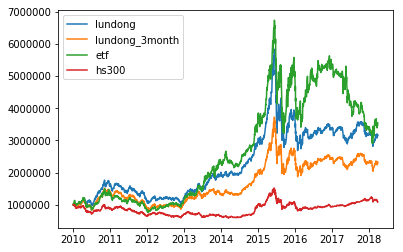

In [8]:
backtest1.show(df,['lundong','lundong_3month','etf'])

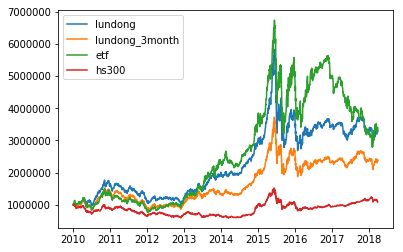

In [14]:
backtest1.show(df,['lundong','lundong_3month','etf'])

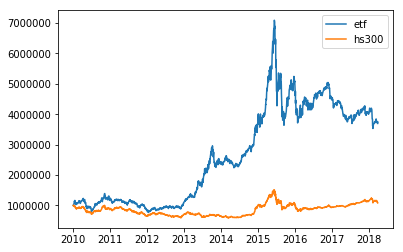

In [91]:
backtest1.show(df,['etf'])

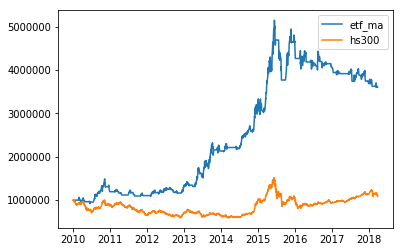

In [61]:
backtest1.show(df,['etf_ma'])